**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center> 
<center>слушателя Луниной Татьяны Сергеевны<br>группы № 682 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Аналитик данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


#### <center> Москва, 2022<br>
<br>

### Цель исследования:


Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на рейтинг вин. Для анализа используется набор данных из Kaggle, крупнейшего в мире сообщества специалистов по данным и машинному обучению. Набор данных состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

Выполнение задачи предполагает выполнение следующих этапов исследования:

<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление структуры развития рынка вина каждого региона.</a><br>
<a href=#4>4.  Проведение исследования статистических показателей зависимости цены вина от рейтинга в регионе.</a><br>
<a href=#5>5.  Проверка гипотез.</a><br>
<a href=#6>6.  Выводы</a><br>
 

#### Дополнительные данные

In [3]:
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "white",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}

country_to_continent = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
}

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <a name="1">1. Предобработка данных</a>

#### ЗАДАЧИ:
* импортировать библиотеки<br>
* загрузить данные<br>
* преобразовать данные в нужные типы<br>
* обработать пропуски при необходимости<br>
* внести дополнительные столбцы данных<br>
* преобразовать данные в нужные типы, описать в каких столбцах заменили типы и почему<br>
* обработать пропуски (при необходимости)<br>
* объяснить, почему заполнили пропуски определённым образом или почему не стали это делать<br>
* предположить причины, которые могли привести к пропускам<br>
* проверить наличие дубликатов<br>

#### Импортируем необходимые библиотеки

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
plt.style.use('ggplot')

In [6]:
df = pd.read_csv('winemag-data_first150k.csv')
df.info()
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Описание содержимого столбцов:

- Unnamed: 0 - индексы.<br>
- country — страна происхождения вина.<br>
- description — описание вкусового профиля вина.<br>
- designation — виноградник, ягоды которого используются при изготовлении вина.<br>
- points — оценка вина, согласно рейтинга журнала Wine Enthusiast, в баллах по шкале от 1 до 100.<br>
- price — стоимость одной бутылки вина.<br>
- province — место изготовления вина (провинция или штат).<br>
- region_1 — винодельческая область в провинции или штате (например, долина Напа в штате Калифорния).<br>
- region_2 — (необязательно) конкретный зона виноделия в винодельческой области (например, Резерфорд в долине Напа).<br>
- variety — сорт винограда, который используется при изготовлении вина (например, Пино Нуар).<br>
- winery — винодельня-производитель вина.<br>
<br>
<br>

In [7]:
print('Размерность данных:', df.shape[0], 'строк,', df.shape[1], 'столбцов')

Размерность данных: 150930 строк, 11 столбцов


Выводы:
- были импортированы 7 необходимых библиотек с соотвутствующими алиасами;
- по-умолчанию установлен цветовой стиль для графики 'ggplot';
- загружен датасет "winemag-data_first150k.csv" с сайта https://www.kaggle.com/;
- данные содержат информацию о рейтинге вин по версии журнала Wine Enthusiastic за 2017 год;
- загруженный сет включает в себя 150 930 строк и 11 столбцов.

Используя данные выше словари 'color' и 'country_to_continent' добавим соответствующие столбцы в датафрэйм:

In [8]:
df['color'] = df['variety'].map(color)
df['continent'] = df['country'].map(country_to_continent)

Проверим наличие пропущенных значений по столбцам

In [9]:
df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
color          26869
continent         26
dtype: int64

Text(0.5, -0.3, 'Рисунок 1.1 - Диаграмма пропущенных значений по столбцам')

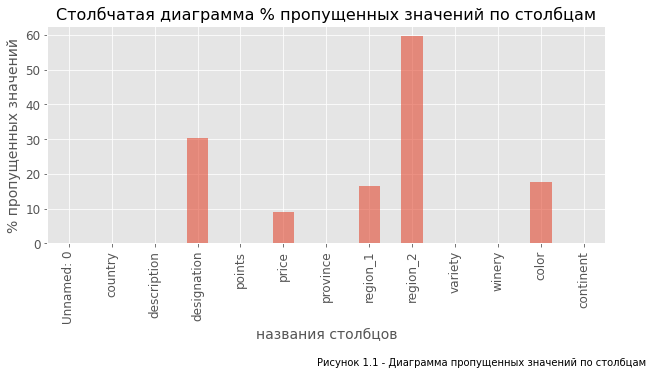

In [10]:
plt.figure(figsize=(10,4))
round(df.isnull().mean()*100,2).plot.bar(alpha=0.6, label=True)
plt.title('Столбчатая диаграмма % пропущенных значений по столбцам', fontsize=16)
plt.xlabel('названия столбцов', fontsize=14)
plt.ylabel('% пропущенных значений', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.3, "Рисунок 1.1 - Диаграмма пропущенных значений по столбцам" )

Удалим столбцы Unnamed: 0 как неинформативный и Region_2 где отсутствуют 60% данных

In [11]:
df= df.drop(columns = 'Unnamed: 0')
df= df.drop(columns = 'region_2')

Пропущенных значений в столбце 'designation' слишком много чтобы их просто удалить (более 30%). Зоны виноделия 'region_1' могут понадобиться нам для дальнейшего анализа.<br>

Пропущенные значения этих столбцов заменим на 'unknown':

In [12]:
df['designation'].fillna('unknown', inplace = True)
df['region_1'].fillna('unknown', inplace = True)

In [13]:
df.duplicated().sum()

53079

Попробуем удалить дубликаты, возможно изменится количество пропущенных значений в оставшихся столбцах

In [14]:
df=df.drop_duplicates(keep=False).reset_index(drop=True)

In [15]:
df=df.drop_duplicates(keep=False).reset_index(drop=True)
print(f'После удаления дубликатов количество строк в датафрэйме {df.shape[0]}')

После удаления дубликатов количество строк в датафрэйме 58564


Еще раз взглянем на отсутствующие значения:

In [16]:
df.isna().sum()

country            2
description        0
designation        0
points             0
price           5258
province           2
region_1           0
variety            0
winery             0
color          10782
continent          5
dtype: int64

Заполним пропущенные значения наименований стран:

In [17]:
df[pd.isnull(df.country)]

,country,description,designation,points,price,province,region_1,variety,winery,color,continent
920,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,unknown,Assyrtiko,Tsililis,NaN,NaN
1176,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,unknown,Red Blend,Büyülübağ,red,NaN


In [18]:
df.loc[920,'country'] = 'Greece'
df.loc[1176,'country'] = 'Turkey'

Заполним пропущенные значения наименований континентов:

In [19]:
df[pd.isnull(df.continent)]

,country,description,designation,points,price,province,region_1,variety,winery,color,continent
920,Greece,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,unknown,Assyrtiko,Tsililis,NaN,NaN
1176,Turkey,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,unknown,Red Blend,Büyülübağ,red,NaN
52615,Tunisia,An irresistible rosé from Tunisia (made by Sic...,Selian Mystère,87,NaN,Tunisia,unknown,Rosé,Domaine Neferis,other,NaN
53507,Tunisia,Sicily's Calatrasi is also present in Tunisia ...,Selian,85,NaN,Tunisia,unknown,White Blend,Domaine Neferis,white,NaN
55740,US-France,"Defies categorization, in more ways than one. ...",unknown,88,50.0,Santa Barbara County-Condrieu,unknown,Viognier,Deux C,white,NaN


In [20]:
df.loc[920,'continent'] = 'Europe'
df.loc[1176,'continent'] = 'Asia'
df.loc[[52615, 53507],'continent'] = 'Africa'
df.loc[55740,'continent'] = 'North America'

In [21]:
df.continent.unique()

array(['North America', 'Europe', 'Latin America', 'Africa', 'Oceania',
       'Asia'], dtype=object)

Избавимся от пропущенных значений в столбце 'province'

In [22]:
df[pd.isnull(df.province)]

,country,description,designation,points,price,province,region_1,variety,winery,color,continent
920,Greece,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,unknown,Assyrtiko,Tsililis,NaN,Europe
1176,Turkey,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,unknown,Red Blend,Büyülübağ,red,Asia


Т.к. строки с пропущенными названиями провинций содержат информацию о рейтинге и цене, сохраним их и заполним словом 'unknown'.

In [23]:
df['province'].fillna('unknown', inplace = True)

Заполним пропущенные значения наименований цвета вина

Избавимся от апострофов в названии сортов винограда:

In [24]:
df.loc[[7544, 41110, 41135],'variety'] = 'Cesanese dAffile'
df.loc[24404,'variety']  = "Loin de lOeil"

В столбце 'color' пропущено 10782 значения, это 18% данных цвета вин. Используя общие знания, доступные данные и открытые источники восполним данные о цвете вина, получаемого из того или иного сорта винограда. Будем добавлять ключевые слова из сорта винограда для определения цвета вина.

In [25]:
df.loc[(df['color'].isnull() & df.variety.str.contains(
       'Cesanese dAffile|Carnelian|Moristel|Pardina|Colorino|Groppello|St. Vincent|Rufete|Franconia|Gragnano|Mandilaria|Grignolino|Blauer Portugieser|Maréchal Foch|Alvarelhão|Crespiello|Tocai Rosso|Albarossa|Argaman|Sousão|Mazuelo|Valdiguié|Casavecchia|Segalin|Bovale|Vidadillo|Maturana|Mavrotragano|Braucol|Cesanese dAffile|Carineña|Kuntra|Refosco|Prokupac|Kallmet|Nerello Cappuccio|Aragonez|Ruen|Malbec Blend|Perricone|Pugnitello|Sirica|Ciliegiolo|Blauburgunder|Früburgunder|Mavrud|Karasakiz|Enantio|Mavroudi|Kadarka|Mondeuse|Parraleta|Durif|Magliocco|Feteasca|Black Monukka|Portuguiser|Negrette|Aragonês|Jaen|Pied de Perdrix|Counoise|Feteasca Neagra|Boğazkere|Mauzac|Listán Negro|Trincadeira|Uva di Troia|Mataro|Charbono|Piedirosso|Saperavi|Pinot Meunier|Cesanese dAffile|Monica|Vranec|Petite Verdot|Raboso|Dornfelder|Alfrocheiro|Lemberger|Susumaniello|Duras|Okuzgozu|Lacrima|Touriga Franca|Vignoles|Teran|Frappato|Mavrodaphne|Prieto Picudo|Kekfrankos|Bobal|Spätburgunder|red|cabernet|nero|noir|sangiovese|merlot|negroamaro|shiraz|syrah|tempranillo|primitivo|montepulciano|trebbiano|garnacha|corvina|Agiorgitiko|Grenache|Gamay|Dolcetto|Meritage|Aglianico|Feudi|Pinotage|Mourvèdre|Zweigelt|Blaufränkisch|Tinta de Toro|Petit Verdot|Mencía|G-S-M|Touriga Nacional|Bonarda|Tannat|St. Laurent|Monastrell|Carignan|Tinto del Pais|Fer Servadou|Mansois|Sagrantino|Prugnolo Gentile|Lagrein|Malvasia Nera|Kalecik Karasi|Claret|Cannonau|Meoru|Schiava|Tamjanika|St. George|Xinomavro|Palmela|Castelão|Tintilia|Gaglioppo|Nerello Mascalese|Pelaverga Piccolo|Plavac Mali|Bastardo|Tin|Teroldego|Graciano|Alicante',
        case=False, regex=True
)), ['color']] = "red"
df.loc[(df['color'].isnull() & df.variety.str.contains(
       'Chardonelle|Irsai Oliver|Sarba|Chardonel|Malvoisie|Athiri|Asprinio|Xynisteri|Avesso|Altesse|Tocai|Manzoni|Vilana|Rebula|Bual|Caprettone|Morillon|Muskat|Picapoll|Torontel|Moscofilero|Catalanesca|Erbaluce|Loin de lOeil|Albarín|Cerceal|Cserszegi Fűszeres|Favorita|Királyleányka|Koshu|Xinisteri|Torbato|Edelzwicker|Petroulianos|Steen|Malvar|Trousseau Gris|Rolle|Sacy|Grecanico|Jacquère|Feteascǎ Regalǎ|Pinela|Emir|Yapincak|Códega do Larinho|Orangetraube|Žilavka|Kerner|Muskateller|Narince|Vitovska|Vidal|Morava|Roviello|Rivaner|Assyrtiko|Palomino|Malvazija|Incrocio Manzoni|Zierfandler|Gouveio|Cococciola|Malagousia|Pignoletto|Albana|Rabigato|Aragonês|Coda di Volpe|Mtsvane|Siria|Robola|Posip|Traminette|Savatiano|Picpoul|Huxelrebe|Elbling|Rotgipfler|Grechetto|Ansonica|Gros Manseng|Grauburgunder|Moscatel|Posip"Traminette|Auxerrois|Inzolia|Colombard|Macabeo|Norton|Fulkerson|Muscadel|Veltliner|Xarel-lo|Verduzzo|Nosiola|Airen|Chinuri|Muscadet|Moscadello|Ribolla Gialla|Sylvaner|Neuburger|Catarratto|Pallagrello|Moschofilero|Roditis|Alvarinho|Rkatsiteli|Antão Vaz|Hondarrabi Zuri|Passerina|Nuragus|Müller-Thurgau|Encruzado|Nasco|Gelber Muskateller|blan|blanc|bianca|bianco|white|sangiovese|riesling|vermentino|grigio|chardonnay|sauvignon|viognier|Glera|Albariño|Prosecco|Moscato|Garganega|Torrontés|Verdejo|Sémillon|Fiano|Viura|Muscat|Roussanne|Friulano|Sherry|Grillo|Marsanne|Melon|Godello|Greco|Tokaji|Vernaccia|Verdelho|Weissburgunder|Pigato|Azal|Muskat Ottonel|Insolia|Assyrtico|Fernão Pires|Premsal|Silvaner|Verdicchio|Pedro Ximénez|Verdeca|Gelber Traminer|Tai|Morio Muskat|Aligoté|Cortese|Falanghina|Savagnin|Morio Muskat|Pecorino|Arneis|Loureiro|Malvasia|Aidani|Cayuga|Malagouzia|Turbiana|Arinto|Bukettraube|Tokay|Scheurebe|Furmint|Debit|Picolit|Rieslaner|Carricante', 
        case=False, regex=True)), ['color']] = "white"
df.loc[(df['color'].isnull() & df.variety.str.contains(
       'Malmsey|Clairette|Durello|Sideritis|Roscetto|Freisa|País|Espadeiro|Madeira|Sercial|Marzemino|Sämling|Jacquez|Petit Meslier|Forcallà|Nielluciu|Hárslevelü|Symphony|Vinhão|Chasselas|Chambourcin|Aleatico|Dafni|Ruché|Montalbera|Vespaiolo|Bical|Pineau dAunis|Cinsault|Zelen|Karalahna|Angevine|Baga|rosato|rosado|rosé|Siegerrebe|Trepat|Portuguese Sparkling|Mantonico|Apple|Brachetto|Traminer|Lambrusco|Mission|Zibibbo|Petit Manseng', 
        case=False, regex=True)), ['color']] = "other"

Заполнили пропущенные значения цвета вина на 'red', 'white' и 'other'. На самом деле группа other включает в себя много интересных видов вин, таких например как игристые, крепленые, десертные и тп. Но в данном исследовании остановимся подробней только на белых и красных. 

In [26]:
df.isnull().sum()

country           0
description       0
designation       0
points            0
price          5258
province          0
region_1          0
variety           0
winery            0
color             1
continent         0
dtype: int64

Пропущенные значения в столбце 'price'

In [27]:
print(f'Доля отсутствующих значений в столбце "price": {round(df.price.isnull().sum() / df.shape[0] * 100,0)}%')

Доля отсутствующих значений в столбце "price": 9.0%


В данных отсутствуют 9% цен. Заполнять эти пропуски, оперируя только имеющимися данными, было бы некорректно, так что просто удалим их.

In [28]:
df.dropna(subset='price', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53306 entries, 0 to 58563
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      53306 non-null  object 
 1   description  53306 non-null  object 
 2   designation  53306 non-null  object 
 3   points       53306 non-null  int64  
 4   price        53306 non-null  float64
 5   province     53306 non-null  object 
 6   region_1     53306 non-null  object 
 7   variety      53306 non-null  object 
 8   winery       53306 non-null  object 
 9   color        53306 non-null  object 
 10  continent    53306 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.9+ MB


Выводы по разделу Предобработка данных:
* были импортированы 7 необходимых библиотек с соответствующими алиасами;
* по-умолчанию установлен цветовой стиль для графики 'ggplot';
* загружен датасет "winemag-data_first150k.csv" с сайта https://www.kaggle.com/,который содержит информацию о рейтинге вин по версии журнала Wine Enthusiastic за 2017 год;
* загруженный сет включает в себя 150 930 строк и 11 столбцов;
* добавлены два дополнительных столбца "color" и "continent" с информацией о цветах вин и о континентах;
* удалили столбец 'region_2';
* избавились от пропущенных значений:
    - в столбцах 'designation', 'province' и 'region_1' заменили на 'unknown';
    - заполнили недостающую информацию в столбцах 'country', 'color', 'continent';
    - удалили строки с отсутствующими значениями в столбце 'price';
* предобработанный фрэйм содержит 53 306 строки и 11 столбцов.

#  <a name="2"> 2. Исследовательский анализ данных</a>

ЗАДАЧИ:
* исследовать каждый признак вина
* найти наиболее распространенные сорта для каждой страны
* выбрать сорта с наибольшими ценами
* определить, популярные сорта вина в бюджетном сегменте
* посчитать средние цены для каждой страны
* определить, какие сорта вина лидируют по рейтингам
* построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вин
* выявить закономерность влияния на цену цвета и рейтинга. Построить диаграмму рассеяния и посчитать корреляцию

In [29]:
df.describe(include='O')

,country,description,designation,province,region_1,variety,winery,color,continent
count,53306,53306,53306,53306,53306,53306,53306,53306,53306
unique,40,53297,19959,382,1080,560,11482,3,6
top,US,Very ripe and forward in baked fruit or pie-fi...,unknown,California,unknown,Pinot Noir,Williams Selyem,red,North America
freq,24193,2,16585,17082,8389,5250,125,33649,24305


In [30]:
df.variety.value_counts(normalize=True).head(1)

Pinot Noir    0.098488
Name: variety, dtype: float64

Можно сделать предварительные выводы:
- в US (континент North America) производят большее количество вин;
- соответственно самая популярная провинция - американская California;
- самый популярный сорт винограда Pinot Noir (составляет 9.8% среди всех представленных сортов);
- среди винной продукции, почти 70% рынка занимают красные вина.

In [31]:
df.describe().round(2)

,points,price
count,53306.00,53306.00
mean,88.03,34.81
std,3.24,40.63
min,80.00,4.00
25%,86.00,16.00
50%,88.00,25.00
75%,90.00,40.00
max,100.00,2300.00


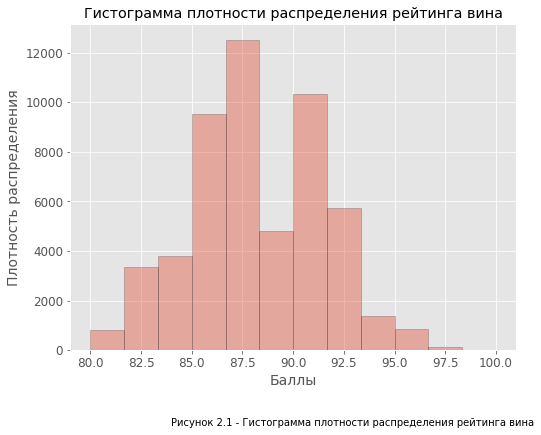

In [32]:
plt.figure(figsize=(8, 6))
sns.distplot(df['points'], hist=True, kde=False, 
             bins=12,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title('Гистограмма плотности распределения рейтинга вина')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Баллы', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.3, -0.05, "Рисунок 2.1 - Гистограмма плотности распределения рейтинга вина")
plt.show()   

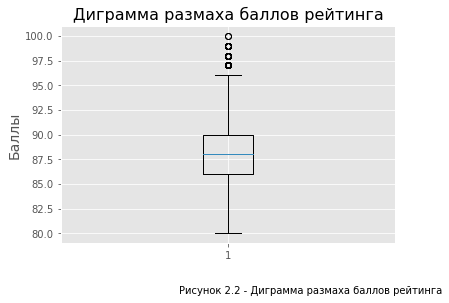

In [33]:
plt.boxplot(df['points'])
plt.title('Диграмма размаха баллов рейтинга', fontsize=16)
plt.ylabel('Баллы',fontsize=14)
plt.figtext(0.4, -0.05, "Рисунок 2.2 - Диграмма размаха баллов рейтинга")
plt.show() 

Распределение баллов рейтинга, судя по графикам, выглядит симметричным. Мода и медиана практически равны, отсутствуют аномальные выбросы.

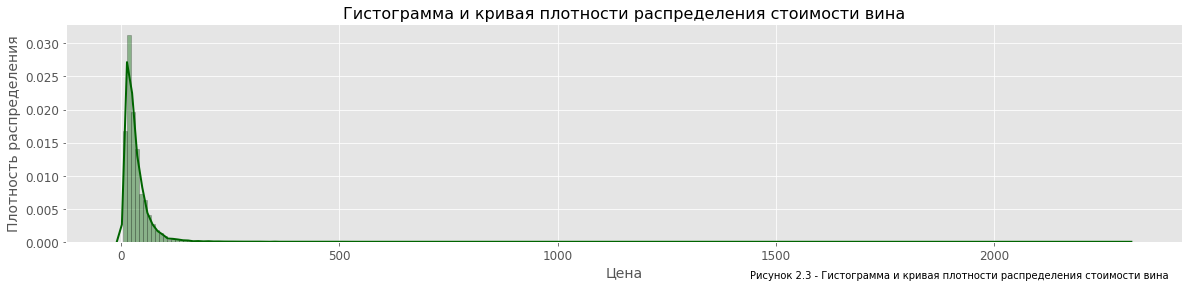

In [34]:
plt.figure(figsize=(20, 4))
sns_plot = sns.distplot(df['price'], hist=True, kde=True,
             bins=250, color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма и кривая плотности распределения стоимости вина', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.6, 0, "Рисунок 2.3 - Гистограмма и кривая плотности распределения стоимости вина")
plt.show() 

Распределение цены имеет явно выраженный положительный перекос, медианное значение 25 намного меньше среднего 35. Это говорит нам о наличии больших выбросов цен. Чтобы убедиться в этом, построим диаграмму размаха для цен в обычном и логарифмическом масштабе.

Text(0.55, 0, 'Рисунок 2.4 - Диграмма размаха цен на вина в обычной и логарифмической шкале')

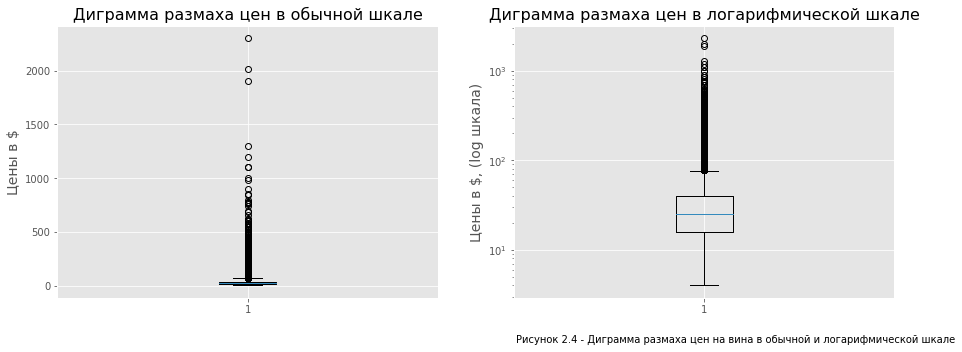

In [35]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['price'])
plt.title('Диграмма размаха цен в обычной шкале', fontsize=16)
plt.ylabel('Цены в $',fontsize=14)

plt.subplot(1, 2, 2)
plt.boxplot(df.price)
plt.yscale('log')
plt.title('Диграмма размаха цен в логарифмической шкале', fontsize=16)
plt.ylabel('Цены в $, (log шкала)',fontsize=14)
plt.figtext(0.55, 0, "Рисунок 2.4 - Диграмма размаха цен на вина в обычной и логарифмической шкале")

На диаграмме слева хорошо видны выбросы цен более 2 тыс, при этом основная масса всех цен расположена в интервале межквартильного размаха: от 16 до 40 за 1 бутылку.
<br>
<br>
<br>
<br>
<br>
<br>

## Построить диаграмму рассеяния и посчитать корреляцию

In [36]:
df.corr()

,points,price
points,1.000000,0.425627
price,0.425627,1.000000


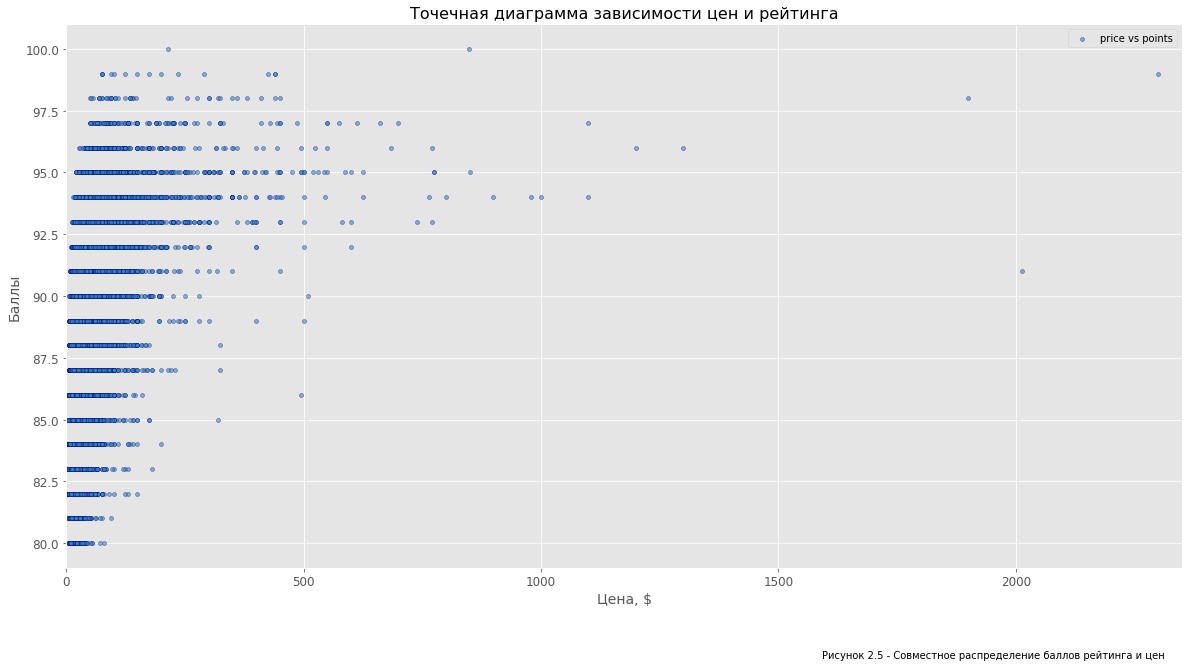

In [37]:
df.plot.scatter(x='price', y='points', xlim=(0, 2350), figsize=(20, 10), s=[16], facecolors="green", edgecolors="darkblue", label='price vs points', alpha=.6)
plt.title('Точечная диаграмма зависимости цен и рейтинга', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена, $', fontsize=14)
plt.ylabel('Баллы', fontsize=14)
plt.figtext(0.65, 0, "Рисунок 2.5 - Совместное распределение баллов рейтинга и цен")
plt.show()  

## POINTS

Попробуем разделить наши вина на группы по критерию схожести рейтинга.Привлечем данные с сайта https://www.wineenthusiast.com/.

Проранжируем имеющиеся баллы и создадим рейтинг вин:
* 1 - classic (100-98);
* 2 - superb (97-94);
* 3 - excellent (93-90);
* 4 - very good (89-87);
* 5 - good (86-83);
* 6 - acceptable (82-80).

Напишем функцию points_group, которая принимая значение рейтинга вина присваивает ему класс от 1 (самого признанного) до 6 (приемлемого)

In [38]:
def points_group(points):
    if 80 <= points <= 82:
        return '6'    
    elif 83 <= points <= 86:
        return '5'  
    elif 87 <= points <= 89:
        return '4'    
    elif 90 <= points <= 93:
        return '3'
    elif 94 <= points <= 97:
        return '2'   
    return '1' 

Создадим новый столбец с категориями вин по рейтингу:

In [39]:
df['rating'] = df['points'].apply(points_group)
display(df.head())

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,red,North America,2
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,red,Europe,2
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,white,North America,2
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,red,North America,2
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,red,Europe,2


Посмотрим теперь на точечную диаграмму распределения цены и рейтинга, но теперь с учетом получившихся классов:

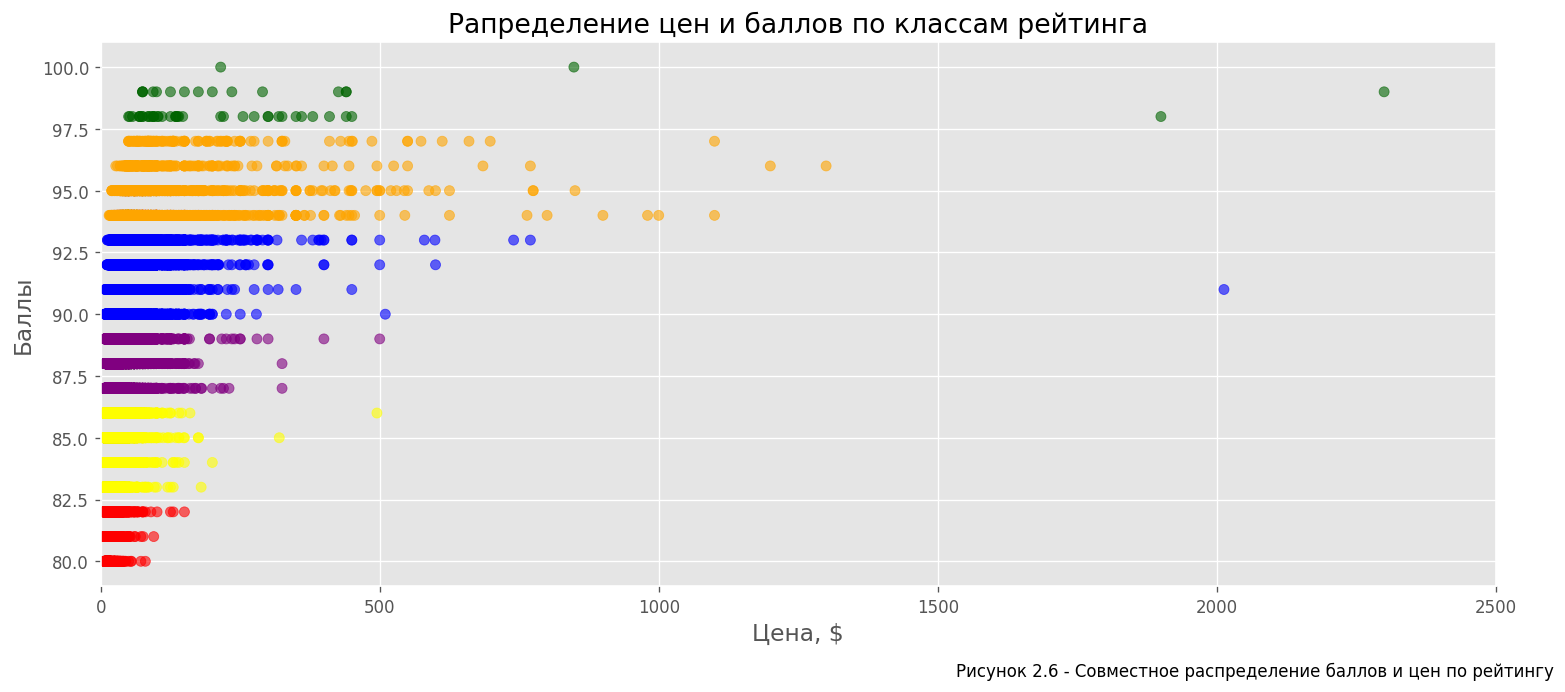

In [40]:
plt.style.use('ggplot')
plt.subplots(figsize=(15,6), dpi=120)
colors = {'1':'darkgreen', '2':'orange', '3':'blue', '4':'purple', '5':'yellow', '6':'red'}
plt.scatter(df.price, df.points, alpha=0.6, c=df.rating.apply(lambda x: colors[x]))
plt.title('Рапределение цен и баллов по классам рейтинга', fontsize=16)
plt.xlabel('Цена, $', fontsize=14)
plt.ylabel('Баллы', fontsize=14)
plt.xlim(0,2500)
plt.figtext(0.6, 0, "Рисунок 2.6 - Совместное распределение баллов и цен по рейтингу")
plt.show()

In [41]:
df.groupby('rating')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,56.0,269.535714,388.002997,50.0,93.0,139.0,304.75,2300.0
2,2329.0,102.689137,107.472871,15.0,50.0,71.0,105.00,1300.0
3,16076.0,46.553371,37.257600,7.0,26.0,40.0,55.00,2013.0
4,17325.0,28.604964,19.742028,6.0,17.0,23.0,35.00,500.0
5,15362.0,20.732327,14.228966,4.0,12.0,17.0,25.00,495.0
6,2158.0,18.068582,11.521882,5.0,11.0,15.0,22.00,150.0


К первому классу относятся наиболее титулованный вина, произведенные в единичных экземплярах на элитных винодельнях, так что здесь видим наибольший разброс цен (от 50 до 2300), большое стандартное отклонение от среднего (388 при среднем значении цены 270) и большая разница между средним и медианным значением (почти 130).Наиболее многочисленный класс - 4й. Классы, в которых рейтинг распределяется более или менее симметрично - 2й, 5й и 6й.

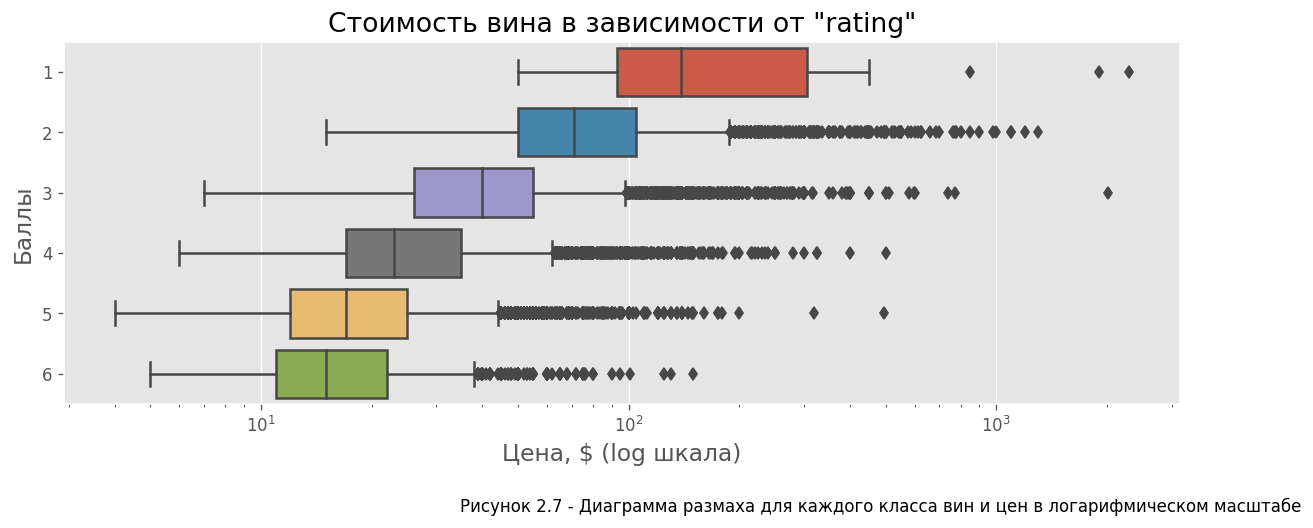

In [42]:
plt.subplots(figsize=(12,4), dpi=120)
sns.boxplot(
    x='price',
    y='rating',
    data=df.sort_values('rating'),
    orient="h"
)
plt.title('Стоимость вина в зависимости от "rating"', fontsize=16)
plt.xscale('log')
plt.figtext(0.4, -0.1, "Рисунок 2.7 - Диаграмма размаха для каждого класса вин и цен в логарифмическом масштабе")
plt.xlabel('Цена, $ (log шкала)', fontsize=14)
plt.ylabel('Баллы', fontsize=14)
plt.show()

После разбиения вин на классы по рейтингу, цены достаточно хорошо разошлись по схожим группам. Конечно, с наличием значительных выбросов надо будет отдельно разбираться.

## COLOR

In [43]:
df.color.value_counts()

red      33649
white    17064
other     2593
Name: color, dtype: int64

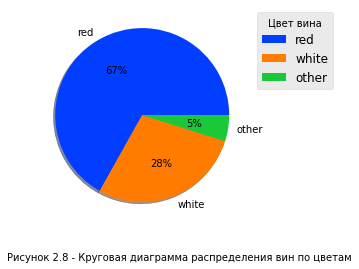

In [44]:
fig = plt.figure()
data = [35645, 15068, 2593]
keys = ['red', 'white', 'other']
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, shadow=True, autopct='%.0f%%')
plt.legend(title="Цвет вина", bbox_to_anchor = (1,1), fontsize='12')
plt.figtext(0.2, 0, "Рисунок 2.8 - Круговая диаграмма распределения вин по цветам")
plt.show()

Наиболее популярным в производстве является красное вино (67%), треть рынка занимает белое вино и только 5% - прочие разновидности.

In [45]:
df.groupby('color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
other,2593.0,30.598920,32.564104,6.0,14.0,20.0,35.0,495.0
red,33649.0,39.132129,42.587095,4.0,18.0,30.0,48.0,2300.0
white,17064.0,26.934599,36.292258,4.0,15.0,20.0,30.0,2013.0


Text(0.6, -0.03, 'Рисунок 2.9 - Точечные диаграммы распределения баллов и цен для вин разных цветов')

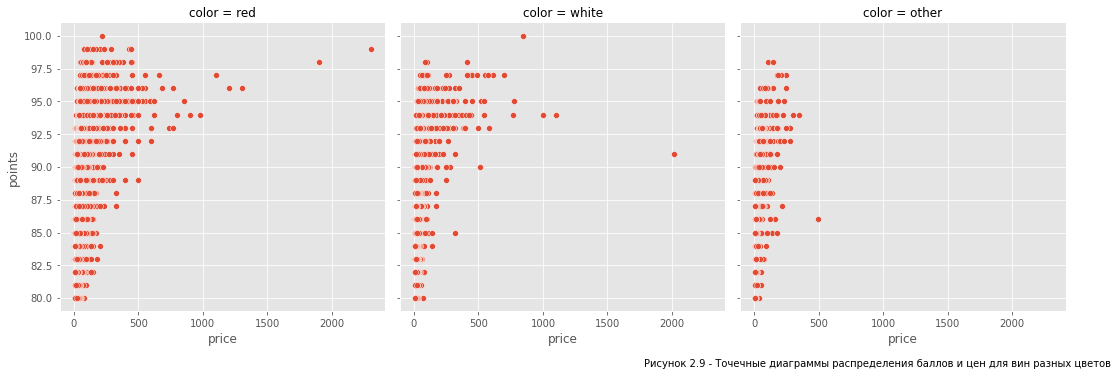

In [46]:
sns.relplot(x='price',
            y='points',
            col='color',
            data=df)
plt.figtext(0.6, -0.03, "Рисунок 2.9 - Точечные диаграммы распределения баллов и цен для вин разных цветов")

На каждом графике имеются выбросы цен, посмотрим с чем же они связаны.

In [47]:
from statistics import median
df.query('(color=="red") | (color=="white")').groupby(['rating', 'color'])['price'].agg(['min', np.mean, median, 'max']).unstack()

min              mean             median            max        
color    red white         red       white    red  white     red   white
rating                                                                  
1       50.0  86.0  267.800000  361.750000  139.0  256.5  2300.0   848.0
2       20.0  15.0  104.099708   97.648897   75.0   60.0  1300.0  1100.0
3        8.0   7.0   50.146409   37.723390   43.0   30.0   770.0  2013.0
4        6.0   6.0   32.241013   22.395716   27.0   19.0   500.0   250.0
5        4.0   4.0   23.264463   17.035546   19.0   15.0   200.0   320.0
6        5.0   5.0   19.449038   15.368827   16.0   14.0   150.0    75.0

Заметим, что практически везде медианные и средние цены на красные вина выше, чем на белые. Исключение составляет группа 1 категории вин.
<br>
<br>
<br>
<br>

### OTHER_color

In [48]:
df.query('color=="other"').nlargest(1, columns='price')

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
32399,France,"This new Champagne brand's rosé is soft, with ...",Noblesse d'Or Brut Rosé,86,495.0,Champagne,Champagne,Champagne Blend,Michel Moritz,other,Europe,5


In [49]:
df.query('(color == "other") & (variety == "Champagne Blend")')['price'].mean().round(0)

72.0

In [50]:
df.query('winery == "Michel Moritz"')

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
31889,France,"This ripe, full-bodied offering has a soft fee...",Noblesse Brut,87,70.0,Champagne,Champagne,Champagne Blend,Michel Moritz,other,Europe,4
32399,France,"This new Champagne brand's rosé is soft, with ...",Noblesse d'Or Brut Rosé,86,495.0,Champagne,Champagne,Champagne Blend,Michel Moritz,other,Europe,5
46455,France,"From the lesser-quality 2006 vintage, this is ...",Noblesse d'Or Vintage Brut,87,220.0,Champagne,Champagne,Champagne Blend,Michel Moritz,other,Europe,4


Вино из категории 'other', Champagne Blend цена которого 495 гораздо превышает средние цены ему подобных (72) - это французское розовое игристое вино с винодельни Michel Moritz. Отметим, что при прочих равных условиях, цены на вина одного цвета с одной винодельни различаются и зависят от 'designation' (виноградников внутри виноделен, на которых выращивают один и тот же сорт винограда). Получается, что в данному случае 'designation' стал определяющим цену фактором.

### WHITE_color

In [51]:
df.query('color=="white"').nlargest(1, columns='price')

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
9523,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Chardonnay,Blair,white,North America,3


In [52]:
df.query('(color == "white") & (variety == "Chardonnay") & (winery=="Blair")')

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
9523,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Chardonnay,Blair,white,North America,3
17759,US,"Golden roasted nuts, shredded pineapple and wh...",Defina's Vineyard,92,45.0,California,Arroyo Seco,Chardonnay,Blair,white,North America,3


Вывод можно сделать аналогичный предыдущему. Данных, представленных в исходной фрэйме, недостаточно для корректного предсказания цен на вина.

Американские белые вина, один и тот же сорт винограда (Chardonnay) для которых выращен на разных виноградниках в пределах одной винодельни, различаются в цене в 45 раз! 

### RED_color

In [53]:
df.query('color=="red"').nlargest(5, columns='price')

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
20243,France,"A big, powerful wine that sums up the richness...",unknown,99,2300.0,Bordeaux,Pauillac,Bordeaux-style Red Blend,Château Latour,red,Europe,1
20245,France,"A massive wine for Margaux, packed with tannin...",unknown,98,1900.0,Bordeaux,Margaux,Bordeaux-style Red Blend,Château Margaux,red,Europe,1
20262,France,"The purest Cabernet Sauvignon fruit, with dark...",unknown,96,1300.0,Bordeaux,Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild,red,Europe,2
20265,France,"Solid, very structured, packed with dense and ...",unknown,96,1200.0,Bordeaux,Pessac-Léognan,Bordeaux-style Red Blend,Château Haut-Brion,red,Europe,2
20250,France,"Such a generous and ripe wine, with a dark cor...",unknown,97,1100.0,Bordeaux,Pessac-Léognan,Bordeaux-style Red Blend,Château La Mission Haut-Brion,red,Europe,2


Как видим, самые дорогие красные вина производят во Франции, виноград для него (Bordeaux-style Red Blend) выращивают в провинции Bordeaux. Посмотрим, имеет ли значение в какой именно винодельческой области в пределах этой провинции выращен виноград.

## REGION_1

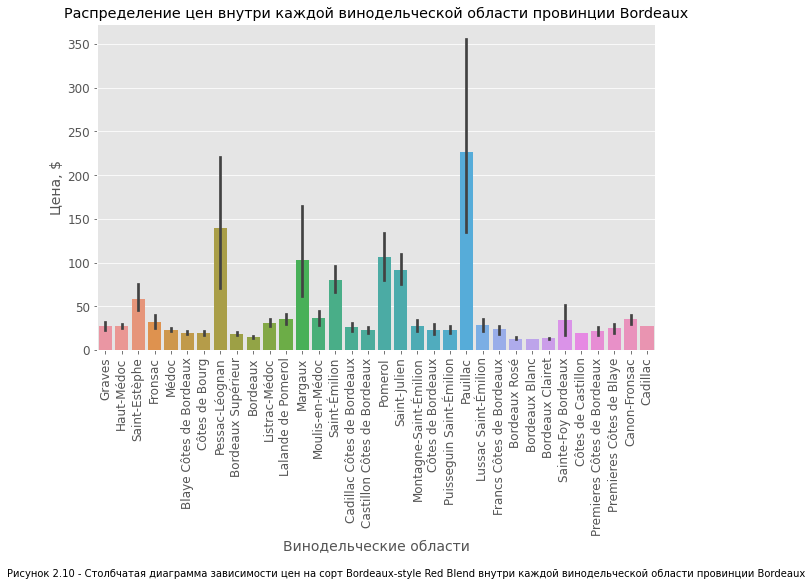

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data = df.query('(variety=="Bordeaux-style Red Blend")&(province=="Bordeaux")'), x='region_1',y='price',ax=ax).set_title('Распределение цен внутри каждой винодельческой области провинции Bordeaux')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Винодельческие области',fontsize=14)
plt.ylabel('Цена, $',fontsize=14)
plt.figtext(0, -0.4, "Рисунок 2.10 - Столбчатая диаграмма зависимости цен на сорт Bordeaux-style Red Blend внутри каждой винодельческой области провинции Bordeaux")
plt.show()

In [55]:
df.query('(variety=="Bordeaux-style Red Blend")&(province=="Bordeaux")&((region_1 in "Pauillac")|(region_1=="Pessac-Léognan"))').groupby('region_1')['price'].agg([min,median,np.mean,max,'count'])

,min,median,mean,max,count
region_1,,,,,
Pauillac,23.0,85.0,226.446809,2300.0,47
Pessac-Léognan,18.0,53.0,139.000000,1200.0,41


Судя по графику, цены на один и тот же сорт выращенного винограда в пределах одной провинции сильно разнятся по областям. Так, цены на вина красного сорта Bordeaux-style Red Blend, выпущенные винодельческой французской коммуной Пойяк (Pauillac), варьируются от 23 до 2300$/бут.

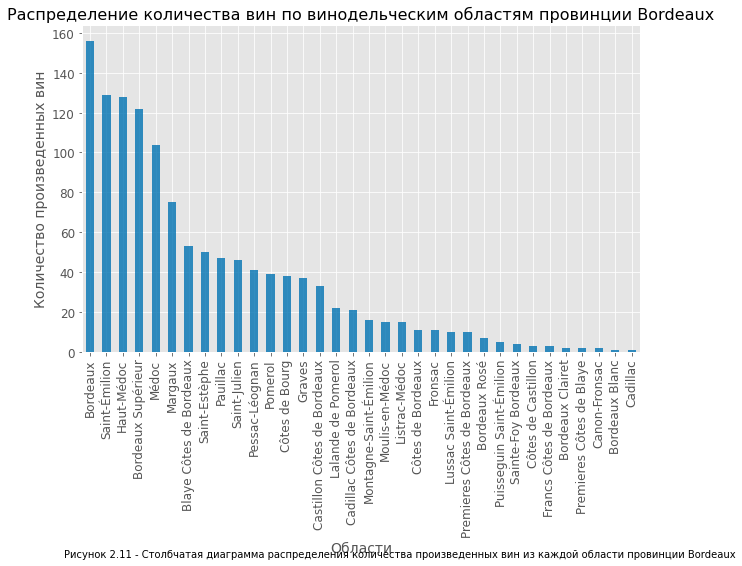

In [56]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
df.query('(variety=="Bordeaux-style Red Blend")&(province=="Bordeaux")')['region_1'].value_counts().plot.bar('green',alpha=0.8)
plt.columns = ['region_1','counts']
plt.title('Распределение количества вин по винодельческим областям провинции Bordeaux',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Области',fontsize=14)
plt.ylabel('Количество произведенных вин',fontsize=14)
plt.figtext(0.1, -0.35, "Рисунок 2.11 - Столбчатая диаграмма распределения количества произведенных вин из каждой области провинции Bordeaux")
plt.show()

Возьмем топ 10 областей из провинции Bordeaux и посмотрим на распределение цен и рейтинга внутри каждой из них

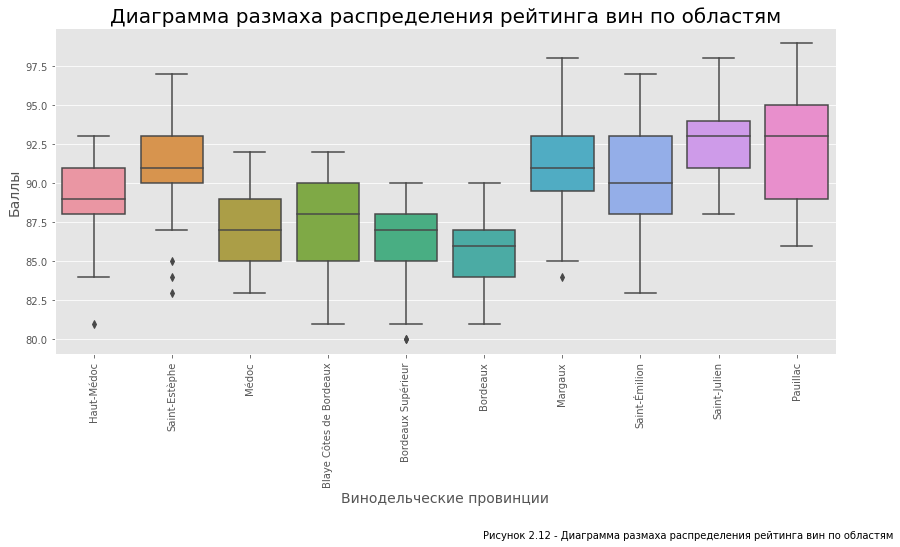

In [57]:
V1= df[df.region_1.isin(df.query('(variety=="Bordeaux-style Red Blend")&(province=="Bordeaux")').region_1.value_counts().head(10).index)]

plt.figure(figsize = (14,6))
plt.title("Диаграмма размаха распределения рейтинга вин по областям", fontsize=20)
sns.boxplot(
    x = 'region_1',
    y = 'points',
    data = V1
)
plt.xticks(rotation = 90)
plt.xlabel('Винодельческие провинции',fontsize=14)
plt.ylabel('Баллы',fontsize=14)
plt.figtext(0.55, -0.3, "Рисунок 2.12 - Диаграмма размаха распределения рейтинга вин по областям")
plt.show()

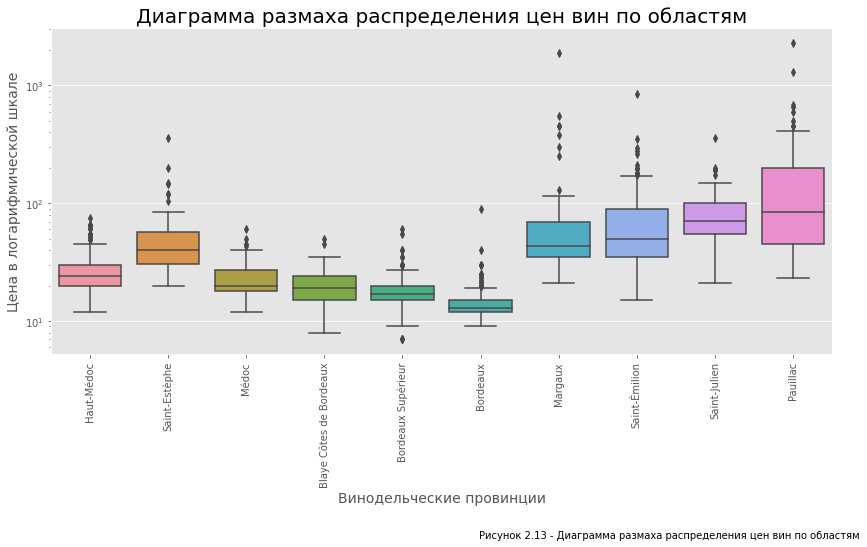

In [58]:
V1= df[df.region_1.isin(df.query('(variety=="Bordeaux-style Red Blend")&(province=="Bordeaux")').region_1.value_counts().head(10).index)]

plt.figure(figsize = (14,6))
plt.title("Диаграмма размаха распределения цен вин по областям", fontsize=20)
sns.boxplot(
    x = 'region_1',
    y = 'price',
    data = V1
)
plt.xticks(rotation = 90)
plt.xlabel('Винодельческие провинции',fontsize=14)
plt.ylabel('Цена в логарифмической шкале',fontsize=14)
plt.yscale('log')
plt.figtext(0.55, -0.3, "Рисунок 2.13 - Диаграмма размаха распределения цен вин по областям")
plt.show()

In [59]:
df[df.region_1.isin(df.query('(variety=="Bordeaux-style Red Blend")&(province=="Bordeaux")').region_1.value_counts().head(10).index)].groupby('region_1')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
region_1,,,,,,,,
Blaye Côtes de Bordeaux,61.0,19.901639,7.743180,8.0,15.0,19.0,24.00,50.0
Bordeaux,169.0,14.727811,7.273353,9.0,12.0,13.0,15.00,90.0
Bordeaux Supérieur,125.0,18.800000,7.844250,7.0,15.0,17.0,20.00,60.0
Haut-Médoc,128.0,27.640625,12.361825,12.0,20.0,24.0,30.00,75.0
Margaux,75.0,102.453333,233.605945,21.0,35.0,43.0,70.00,1900.0
Médoc,104.0,23.019231,8.341010,12.0,18.0,20.0,27.25,60.0
Pauillac,47.0,226.446809,392.227851,23.0,45.0,85.0,200.00,2300.0
Saint-Estèphe,50.0,58.720000,57.499615,20.0,30.5,40.0,57.25,360.0
Saint-Julien,46.0,91.152174,59.829375,21.0,55.0,71.0,100.00,360.0


Вышеприведенные диаграммы размаха показывают, что в пределах одной провинции, большие цены в каждой области соответствуют большим значениям рейтинга. Межквартильный размах почти везде небольшой (10-50), за исключением области Pauillac. Вина самой популярной области Bordeaux в среднем имеют наименьшую стоимость 15. Цены областей Margaux и Pauillac за счет наличя выбросов имеют сильный положительный перекос цен.

При прочих равных условиях (одних и тех же провинций и сортов винограда), винодельческие области также можно отнести к факторам, влияющим на цену. Но, несомненно, каждый случай необходимо изучать отдельно.

## CONTINENT

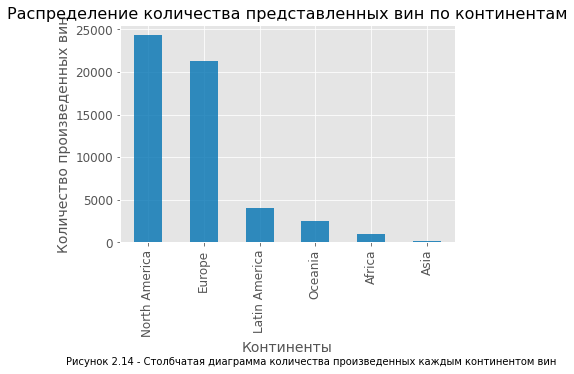

In [60]:
plt.style.use('seaborn-colorblind')
df['continent'].value_counts().plot.bar('green',alpha=0.8)
plt.columns = ['country','counts']
plt.title('Распределение количества представленных вин по континентам',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Континенты',fontsize=14)
plt.ylabel('Количество произведенных вин',fontsize=14)
plt.figtext(0, -0.3, "Рисунок 2.14 - Столбчатая диаграмма количества произведенных каждым континентом вин")
plt.show()

(0.0, 1000.0)

<Figure size 432x432 with 0 Axes>

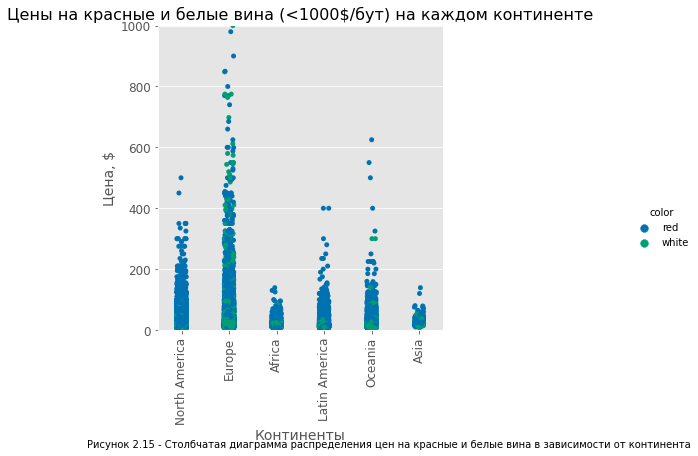

In [61]:
fig = plt.figure(figsize=(6,6))
dff = df.query('(color=="red") | (color=="white")')
sns.catplot(x='continent',
            y='price',
            hue='color',
            data=dff)   
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Континенты',fontsize=14)
plt.ylabel('Цена, $',fontsize=14)
plt.title('Цены на красные и белые вина (<1000$/бут) на каждом континенте',fontsize=16)
plt.figtext(0, -0.2, "Рисунок 2.15 - Столбчатая диаграмма распределения цен на красные и белые вина в зависимости от континента")
plt.ylim(0,1000)  

Text(0.25, -0.1, 'Рисунок 2.16 - Диаграмма размаха распределения цен вин по континентам')

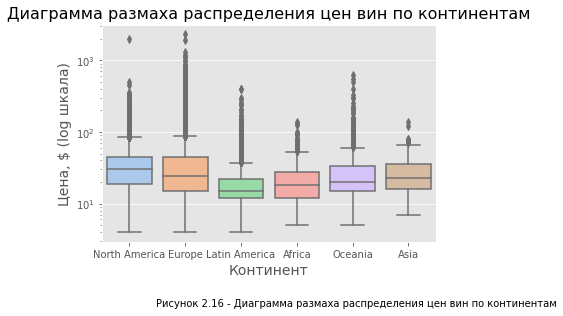

In [62]:
x = df.continent
y = df.price
sns.boxplot(x,y, palette='pastel', orient='v')
plt.xlabel('Континент', fontsize=14)
plt.ylabel('Цена, $ (log шкала)', fontsize=14)
plt.yscale('log')
plt.title('Диаграмма размаха распределения цен вин по континентам',fontsize=16)

plt.figtext(0.25, -0.1, "Рисунок 2.16 - Диаграмма размаха распределения цен вин по континентам" )

Видим, что наиболее дешевые вина производят в Латинской Америке. Используем эту информацию в дальнейшем для определения перспектив развития рынка

In [63]:
df.query('(color=="red") | (color=="white")').groupby(['continent', 'color'])['price'].describe()

count       mean        std   min   25%   50%    75%  \
continent     color                                                           
Africa        red      539.0  25.658627  17.135323   6.0  14.0  20.0  33.00   
              white    394.0  17.944162   9.822958   5.0  11.0  15.0  20.00   
Asia          red      153.0  31.588235  19.094478  10.0  19.0  25.0  39.00   
              white     50.0  22.000000  11.302880   7.0  15.0  18.0  25.75   
Europe        red    11800.0  42.317542  60.814841   4.0  16.0  26.0  50.00   
              white   7687.0  32.842982  46.260462   4.0  15.0  21.0  35.00   
Latin America red     2921.0  24.394728  25.414939   4.0  12.0  17.0  25.00   
              white   1032.0  14.287791   7.395015   5.0  10.0  13.0  16.00   
North America red    16761.0  40.174990  26.871439   4.0  24.0  35.0  50.00   
              white   6867.0  23.806757  27.171764   4.0  15.0  20.0  28.00   
Oceania       red     1475.0  36.689492  39.492522   5.0  18.0  25.0  41.00   
              white   1034.0  20.069632  16.278582   5.0  14.0  17.0  22.00   

                        max  
continent     color          
Africa        red     139.0  
              white    90.0  
Asia          red     139.0  
              white    52.0  
Europe        red    2300.0  
              white  1100.0  
Latin America red     400.0  
              white   115.0  
North America red     500.0  
              white  2013.0  
Oceania       red     625.0  
              white   300.0

Большее количество разнообразных видов вин производят в Северной Америке (а точнее, в США). При том что наиболее дорогостоящие экземпляры, и в абсолютном выражении и в среднем, являются выходцами из Европы. Наименьшим разнообразием отличается Азия, а минимальными в среднем ценами обладают латиноамериканские вина.

Возможно, в дальнейшем, следует изучить как стоимости вин из одних и тех же сортов винограда различаются на континентах. Подробней остановимся на двух наиболее представленных континентах: Европе и Северной Америке.

#### ЕВРОПА

Text(0.2, -0.15, 'Рисунок 2.17 - Круговая диаграмма долей рынка среди европейских стран')

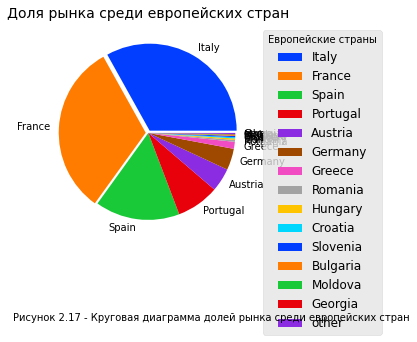

In [64]:
fig = plt.figure()
data = [7034, 6794, 3342, 1687, 927, 847, 276, 73,57,51,50,35,21,17,44]
keys = ['Italy', 'France', 'Spain', 'Portugal', 'Austria', 'Germany', 'Greece', 'Romania', 'Hungary', 'Croatia', 'Slovenia', 'Bulgaria', 'Moldova', 'Georgia', 'other']
palette_color = sns.color_palette('bright')
explode = [0.03, 0.03, 0, 0, 0, 0, 0,0,0, 0, 0, 0, 0, 0,0,]
plt.pie(data, labels=keys, colors=palette_color,explode=explode)
plt.title('Доля рынка среди европейских стран', fontsize='14')
plt.legend(title="Европейские страны", bbox_to_anchor = (1,1), fontsize='12')
plt.figtext(0.2, -0.15, "Рисунок 2.17 - Круговая диаграмма долей рынка среди европейских стран")

#### СЕВЕРНАЯ АМЕРИКА

In [65]:
df.query('continent=="North America"')['country'].value_counts(normalize=True)

US           0.995392
Canada       0.004567
US-France    0.000041
Name: country, dtype: float64

Делаем выводы: Европа представляет собой наиболее популярный континент, Франция и Италия охватывают наибольшую часть рынка. на 3 и 4 местах Испания и Португалия. Североамериканский рынок вин на 99,7% занимает США.

## COUNTRY

Text(0.5, -0.3, 'Рисунок 2.18 - Столбчатая диаграмма количества произведенных вин по топ 20 странам')

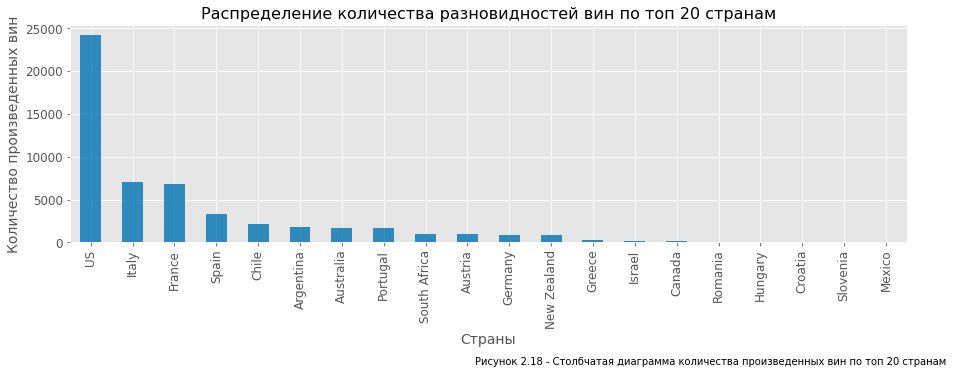

In [66]:
df['country'].value_counts().nlargest(20).plot.bar(figsize=(15,4), alpha=0.8)
plt.columns = ['country','counts']
plt.title('Распределение количества разновидностей вин по топ 20 странам',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Страны',fontsize=14)
plt.ylabel('Количество произведенных вин', fontsize=14)
plt.figtext(0.5, -0.3, "Рисунок 2.18 - Столбчатая диаграмма количества произведенных вин по топ 20 странам")

In [67]:
top_countries = df.country.value_counts(normalize=True).nlargest(7).round(3)
top_countries

US           0.454
Italy        0.132
France       0.127
Spain        0.063
Chile        0.040
Argentina    0.034
Australia    0.033
Name: country, dtype: float64

45% всех вин в данном рейтинге произведены в США, 13.2% в Италии, 12.7% во Франции. Отметим, что в 5 стран вошла латиноамериканская страна Чили, которая производит 4% изучаемых вин.

Text(0.35, 0, 'Рисунок 2.19 - Диаграмма размаха распределения цен вин по континентам')

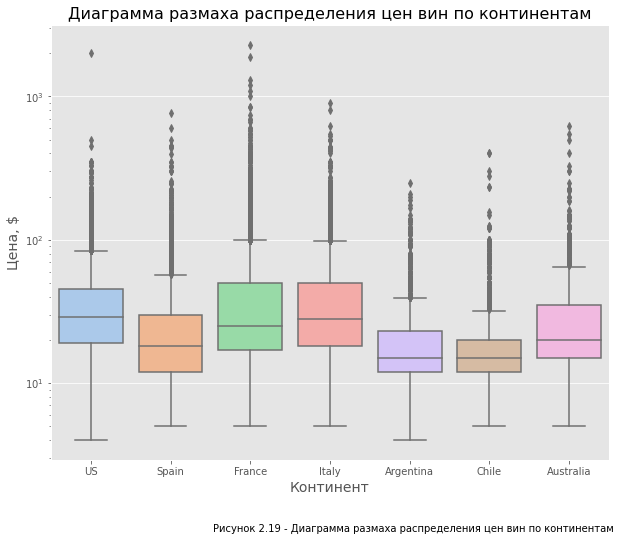

In [68]:
fig = plt.figure(figsize=(10,8))
df_c = df[df.country.isin(top_countries.index)]
x = df_c.country
y = df_c.price
sns.boxplot(x,y, palette='pastel', orient='v')
plt.xlabel('Континент', fontsize=14)
plt.ylabel('Цена, $', fontsize=14)
plt.yscale('log')
plt.title('Диаграмма размаха распределения цен вин по континентам',fontsize=16)

plt.figtext(0.35, 0, "Рисунок 2.19 - Диаграмма размаха распределения цен вин по континентам" )

#### VARIETY

In [69]:
len(df.variety.unique())

560

Text(0.5, -0.6, 'Рисунок 2.20 - Столбчатая диаграмма количества произведенных вин по топ 20 сортам винограда')

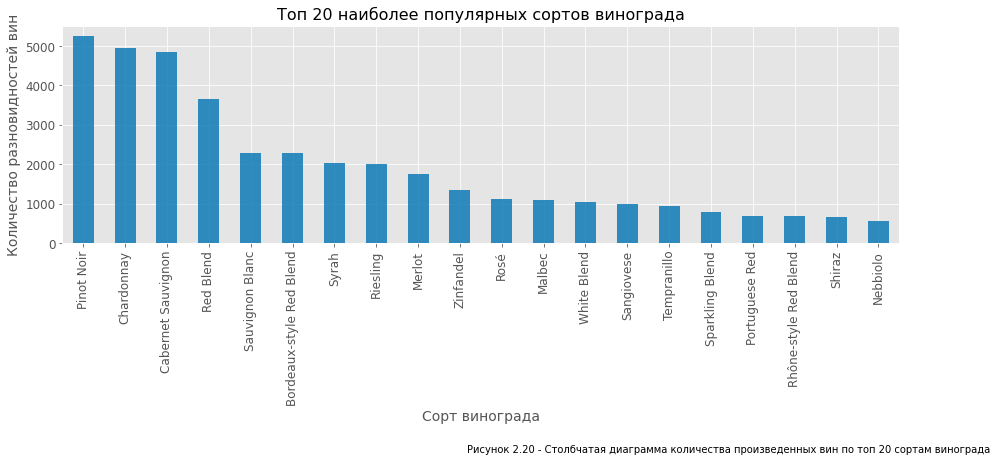

In [70]:
df['variety'].value_counts().nlargest(20).plot.bar(figsize=(15,4), alpha=0.8)
plt.columns = ['variety','counts']
plt.title('Топ 20 наиболее популярных сортов винограда',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Сорт винограда',fontsize=14)
plt.ylabel('Количество разновидностей вин', fontsize=14)
plt.figtext(0.5, -0.6, "Рисунок 2.20 - Столбчатая диаграмма количества произведенных вин по топ 20 сортам винограда" )

Таким образом, Pinot Noir является самым распространенным сортом винограда. Следом за ним с небольшим отрывом идут Chardonnay и Cabernet Savignon. Раз уж эти разновидности так популярны, остановимся на них далее при построении перспектив развития регионов.

Text(0.6, -0.35, 'Рисунок 2.21 - Распределение рейтинга для топ 20 сортов винограда')

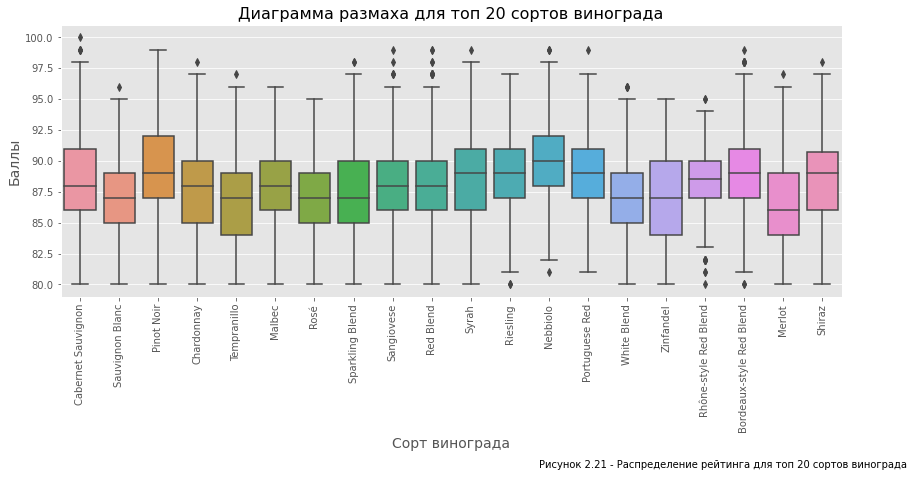

In [71]:
V = df[df.variety.isin(df.variety.value_counts().head(20).index)]

plt.figure(figsize = (14,5))
plt.title("Диаграмма размаха для топ 20 сортов винограда", fontsize=16)
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = V
)
plt.xlabel('Сорт винограда',fontsize=14)
plt.ylabel('Баллы', fontsize=14)
plt.xticks(rotation = 90)
plt.figtext(0.6, -0.35, "Рисунок 2.21 - Распределение рейтинга для топ 20 сортов винограда")

<br>
<br>
<br>

#### PROVINCE

In [72]:
len(df.province.unique())

382

Text(0.5, -0.4, 'Рисунок 2.22 - Столбчатая диаграмма количества произведенных вин по топ 20 провинциям')

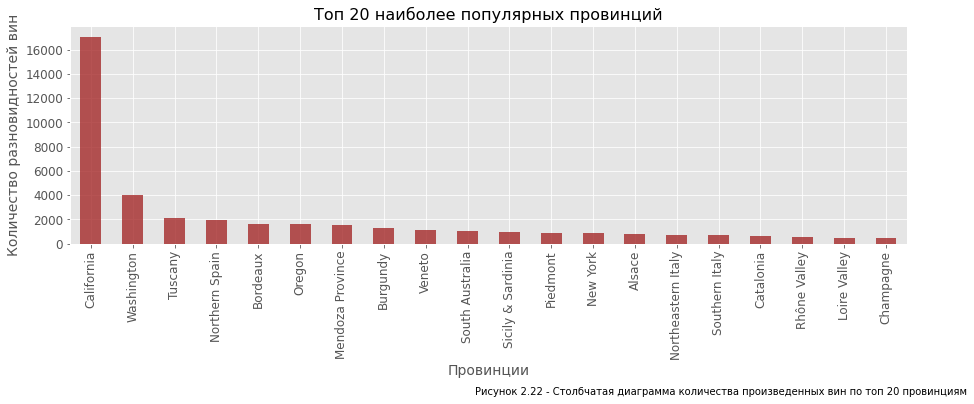

In [73]:
df['province'].value_counts().nlargest(20).plot.bar(figsize=(15,4), alpha=0.8, color='brown')
plt.columns = ['province','counts']
plt.title('Топ 20 наиболее популярных провинций',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Провинции',fontsize=14)
plt.ylabel('Количество разновидностей вин', fontsize=14)
plt.figtext(0.5, -0.4, "Рисунок 2.22 - Столбчатая диаграмма количества произведенных вин по топ 20 провинциям" )

Среди 382 провинций, по популярности с большим отрывом лидирует американская провинция California.

In [74]:
df.groupby(['country','province'])['points'].agg([max, np.mean]).nlargest(10, columns='mean')

max       mean
country     province                                      
New Zealand Martinborough Terrace            93  93.000000
England     England                          94  92.750000
Chile       Rapel Valley-Casablanca Valley   92  92.000000
            Santa Cruz                       93  92.000000
Portugal    Vinho da Mesa                    92  92.000000
Austria     Neusiedlersee-Hügelland          96  91.916667
            Eisenberg                        92  91.333333
Israel      Haut-Judeé                       92  91.333333
Chile       Puente Alto                      94  91.222222
Portugal    Portugal                         97  91.200000

Ответ: наилучшим рейтингом в среднем удостоина новозеландская провинция Martinborough Terrace. Отметим, что на 3-4 местах расположились чилийские провинции Rapel Valley-Casablanca Valley и Santa Cruz

## WINERY

In [75]:
df.groupby(['country','winery'])['price'].max().nlargest(10)

country   winery                       
France    Château Latour                   2300.0
US        Blair                            2013.0
France    Château Margaux                  1900.0
          Château Mouton Rothschild        1300.0
          Château Haut-Brion               1200.0
Austria   Emmerich Knoll                   1100.0
France    Château La Mission Haut-Brion    1100.0
Portugal  Kopke                             980.0
Italy     Biondi Santi                      900.0
France    Château Ausone                    850.0
Name: price, dtype: float64

4 из 5 виноделен, производящих наиболее дорогие экземпляры вина, находятся во Франции.

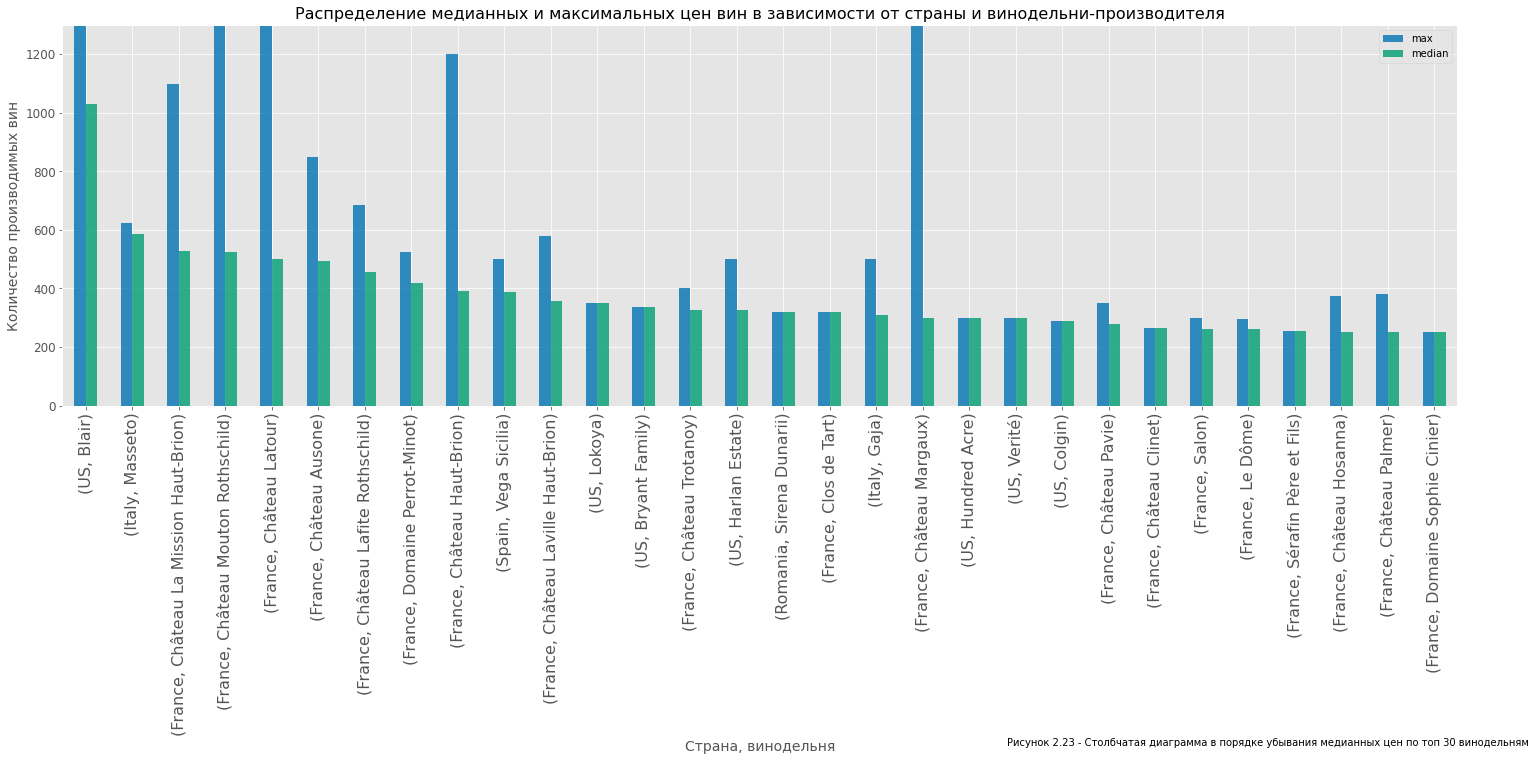

In [76]:
df2 = df.groupby(['country','winery'])['price'].agg([max, median]).nlargest(30, columns='median')

df2.plot.bar(figsize=(25,7), alpha=0.8)
plt.title('Распределение медианных и максимальных цен вин в зависимости от страны и винодельни-производителя', size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0,1300)
plt.xlabel('Страна, винодельня',fontsize=14)
plt.ylabel('Количество производимых вин', fontsize=14)
plt.figtext(0.65, -0.55, "Рисунок 2.23 - Столбчатая диаграмма в порядке убывания медианных цен по топ 30 винодельням" )
plt.show()

Наиболее дорогие (по медианному значению цен) вина производит американская винодельня Blair.

Text(0, -0.4, 'Рисунок 2.24 - Столбчатая диаграмма распределения количества произведенных вин по винодельням')

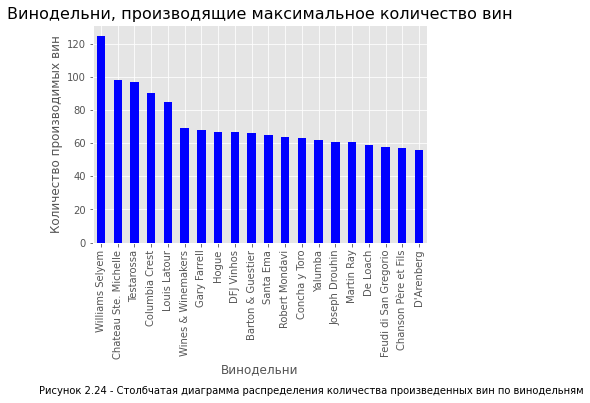

In [77]:
Winery=df[df['winery']!='unknown']
WineryCnt=Winery['winery'].value_counts()
w = WineryCnt.head(20).plot.bar(color='blue')
w.set_title("Винодельни, производящие максимальное количество вин", fontsize=16)
w.set_xlabel("Винодельни", fontsize=12)
w.set_ylabel("Количество производимых вин", fontsize=12)
plt.figtext(0, -0.4, "Рисунок 2.24 - Столбчатая диаграмма распределения количества произведенных вин по винодельням")

Американская винодельня Williams Selyem является одной и старейших в Калифорнии,там производится более 120 разновидностей вин.

## DESIGNATION

In [78]:
df.query('designation != "unknown"').designation.describe()

count       36721
unique      19958
top       Reserve
freq         1006
Name: designation, dtype: object

Данные по виноградникам присутствуют по 36721 наблюдениям. Наиболее часто встречаемое значение это Reserve.

Text(0.5, -0.45, 'Рисунок 2.25 - Столбчатая диаграмма количества произведенных вин по топ 20 виноградникам')

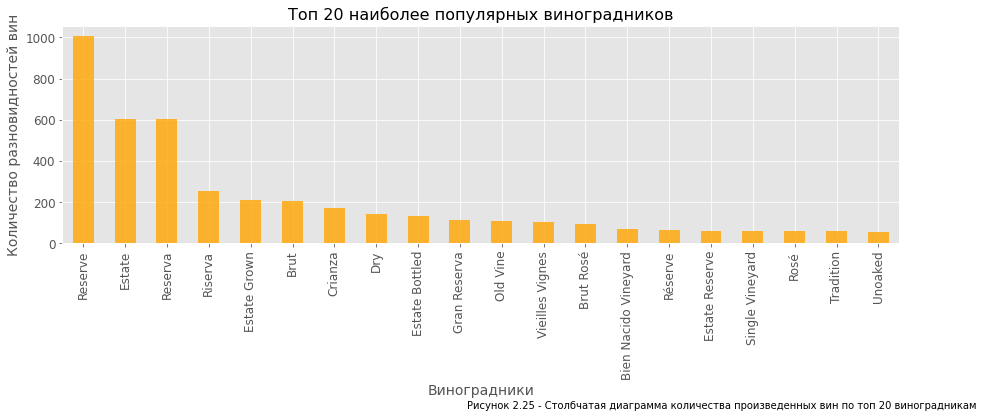

In [79]:
df.query('designation != "unknown"')['designation'].value_counts().nlargest(20).plot.bar(figsize=(15,4), alpha=0.8, color='orange')
plt.columns = ['designation','counts']
plt.title('Топ 20 наиболее популярных виноградников',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Виноградники',fontsize=14)
plt.ylabel('Количество разновидностей вин', fontsize=14)
plt.figtext(0.5, -0.45, "Рисунок 2.25 - Столбчатая диаграмма количества произведенных вин по топ 20 виноградникам" )

## Найти наиболее распространенные сорта для каждой страны

#### В таблице ниже приведены наиболее распространенные сорта винограда для каждой страны.

In [80]:
df_copy = df.copy()
df_agg = df_copy.groupby(['country','variety','color']).agg({'variety':'size'}).rename(columns={'variety':'count'})
df_agg = df_agg.sort_values('count').groupby(level=0).tail(1).sort_index()
df_agg

,,,count
country,variety,color,
Argentina,Malbec,red,715
Australia,Shiraz,red,493
Austria,Grüner Veltliner,white,341
Bosnia and Herzegovina,Vranec,red,1
Brazil,Sparkling Blend,other,2
Bulgaria,Cabernet Sauvignon,red,6
Canada,Riesling,white,28
Chile,Cabernet Sauvignon,red,366
China,White Blend,white,1


Наиболее распространенные сорта винограда, такие как Pinot Noir, Bordeaux-style Red Blend и Red Blend выращивают соответственно в США, Франции и Италии. Надо отметить, что пьедестал популярности занимают красные вина.

## Выбрать сорта с наибольшими ценами

Общее количество красных сортов винограда: 264
Общее количество белых сортов винограда: 252


Text(0.5, 0, 'Рисунок 2.26 - Сорта винограда для производства наиболее дорогих красных и белых вин')

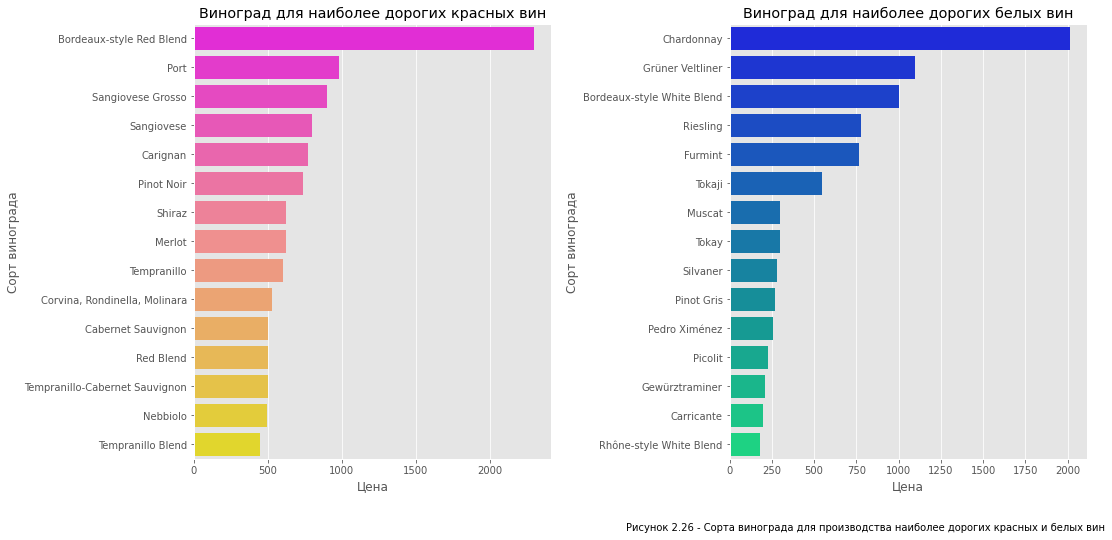

In [81]:
print('Общее количество красных сортов винограда:',df.query('color=="red"')['variety'].nunique())
print('Общее количество белых сортов винограда:',df.query('color=="white"')['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

data_to_plot = df.query('color=="red"').groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = data_to_plot.price, y = data_to_plot.index, palette= 'spring',ax=ax1)
ax1.set_title('Виноград для наиболее дорогих красных вин')
ax1.set_ylabel('Сорт винограда')
ax1.set_xlabel('Цена')

data_to_plot = df.query('color=="white"').groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = data_to_plot.price, y = data_to_plot.index, palette = 'winter',ax=ax2)
ax2.set_title('Виноград для наиболее дорогих белых вин')
ax2.set_ylabel('Сорт винограда')
ax2.set_xlabel('Цена')
plt.subplots_adjust(wspace=0.5)
plt.figtext(0.5, 0, "Рисунок 2.26 - Сорта винограда для производства наиболее дорогих красных и белых вин")

Самое дорогое красное вино производят из сорта винограда Bordeaux-style Red Blend. на 2 и 3 местах расположились Porto и Sangiovese Grosso. Из сорта Chardonnay делают наиболее дорогое белое вино. Gruner Veltliner и Bordeaux-style White Blend также входят в тройку белых сортов по дороговизне.

Text(0.5, 0, 'Рисунок 2.27 - Сорта винограда для производства наиболее в среднем дорогих красных и белых вин')

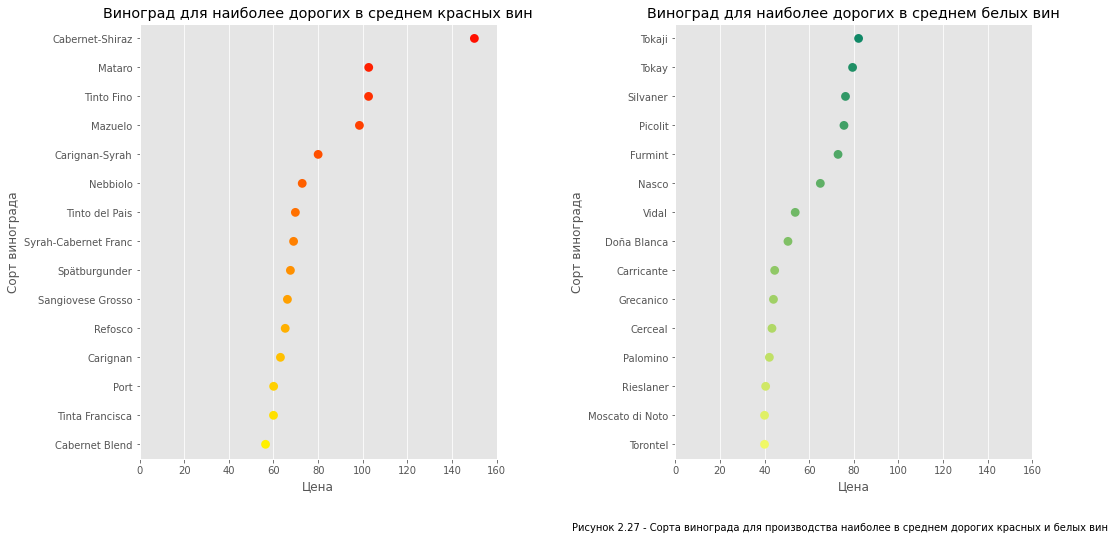

In [82]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

data_to_plot = df.query('color=="red"').groupby(['variety'])['price'].mean().sort_values(ascending=False).to_frame()[:15]
sns.pointplot(x = data_to_plot.price, y = data_to_plot.index, palette= 'autumn',ax=ax1)
ax1.set_title('Виноград для наиболее дорогих в среднем красных вин')
ax1.set_ylabel('Сорт винограда')
ax1.set_xlabel('Цена')
ax1.set_xlim(0,160)

data_to_plot = df.query('color=="white"').groupby(['variety'])['price'].mean().sort_values(ascending=False).to_frame()[:15]
sns.pointplot(x = data_to_plot.price, y = data_to_plot.index, palette = 'summer',ax=ax2)
ax2.set_title('Виноград для наиболее дорогих в среднем белых вин')
ax2.set_ylabel('Сорт винограда')
ax2.set_xlabel('Цена')
ax2.set_xlim(0,160)
plt.subplots_adjust(wspace=0.5)
plt.figtext(0.5, 0, "Рисунок 2.27 - Сорта винограда для производства наиболее в среднем дорогих красных и белых вин")

Однако, если оценивать самые дорогие в среднем вина, получаем несколько другую картину. Среди красных вин лидером становится австралийский сорт Cabernet-Shiraz, а среди белых - венгерский Tokaji.

## Определить популярные сорта вина в бюджетном сегменте

К бюджетному сегменту будем относить вина, средняя цена которых не превышает 15$. 

In [83]:
len(df.variety.unique())

560

In [84]:
cheap = df.groupby('variety')['price'].mean().nsmallest(102)
cheap_df = df[df.variety.isin(cheap.index)]

Среди 560 разновидностей сортов винограда представленных в данном датафрэйме, только 102 из них в среднем стоят не дороже 15$. Определим из них наиболее популярные красные и белые сорта.

In [85]:
cheap_red = cheap_df.query('color=="red"').groupby('variety')['points'].count().sort_values(ascending=False).nlargest(10).round(1)
cheap_red

variety
Tempranillo-Garnacha                   18
Touriga Nacional-Cabernet Sauvignon    14
Bobal                                  14
Castelão                                9
Cabernet Merlot                         9
Merlot-Cabernet                         7
Carmenère-Cabernet Sauvignon            5
Tempranillo-Merlot                      5
Cabernet Sauvignon-Tempranillo          4
Garnacha-Syrah                          4
Name: points, dtype: int64

In [86]:
df[df['variety']=="Tempranillo-Garnacha"]['country'].unique()

array(['Spain'], dtype=object)

In [87]:
cheap_white = cheap_df.query('color=="white"').groupby('variety')['points'].agg([np.mean,'count']).sort_values('count',ascending=False).nlargest(10,columns='count').round(1)
cheap_white

,mean,count
variety,,
Torrontés,85.1,115
Viura,84.3,61
Loureiro,87.4,20
Verdejo-Viura,85.8,14
Inzolia,86.1,14
Chenin Blanc-Chardonnay,86.5,13
Semillon-Chardonnay,85.6,8
Johannisberg Riesling,85.5,6
Colombard-Sauvignon Blanc,85.6,5


In [88]:
df[df['variety']=="Torrontés"]['country'].value_counts(normalize=True)

Argentina    0.991304
US           0.008696
Name: country, dtype: float64

Среди красных вин наиболее популярными в бюджетном сегменте является испанский сорт Tempranillo-Garnacha, среди белых - преимущественно аргентинский Torrontés.

## Посчитать средние цены для каждой страны

Средние цены не принято отображать столбиками, так что построим сводный точечный pointplot, где отобразим все страны.

Text(0.5, 0, 'Рисунок 2.28 - Зависимость средней стоимости вин от страны-производителя')

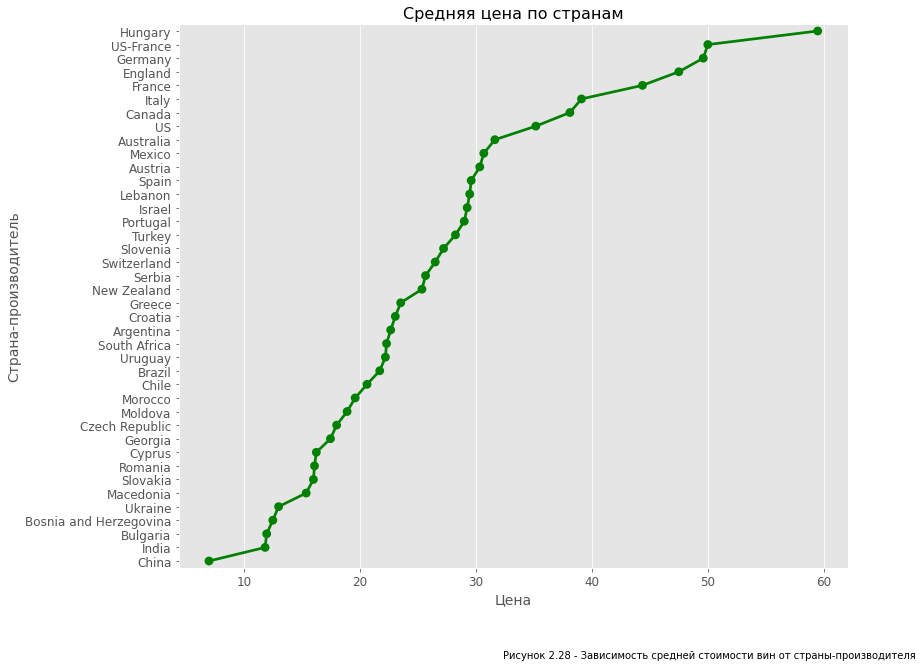

In [89]:
mean_price = df.groupby('country')['price'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(12,10))
sns.pointplot(x = mean_price.price ,y = mean_price.index, color='green', orient='h', alpha=.4)
plt.title('Средняя цена по странам', fontsize=16)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Страна-производитель', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, 0, "Рисунок 2.28 - Зависимость средней стоимости вин от страны-производителя" )

В данном случае такой график не является репрезентативным. Следует помнить, что для расчета средней стоимости нужно поделить суммарную стоимость всех произведенных данной страной вин и их количество. Рассмотрим таблицу ниже:  

In [90]:
df.groupby('country')['price'].agg(['max', 'sum', 'count', np.mean]).sort_values('mean',ascending=False).nlargest(20,columns='mean').round(0)

,max,sum,count,mean
country,,,,
Hungary,764.0,3390.0,57,59.0
US-France,50.0,50.0,1,50.0
Germany,775.0,42016.0,847,50.0
England,75.0,380.0,8,48.0
France,2300.0,301420.0,6794,44.0
Italy,900.0,275094.0,7034,39.0
Canada,100.0,4230.0,111,38.0
US,2013.0,850944.0,24193,35.0
Australia,625.0,54832.0,1733,32.0


Можно отметить, насколько непредсказуемый получился результат. Так в тройку лидеров попала US-France, представленная в выборке всего 1 бутылкой вина. С большим отрывом лидирует Венгрия со средней ценой за бутылку вина 59$. А, к примеру, Франция которая производит самые дорогие вина, расположилась только на 5 месте. <br>

Сравним распределение средних цен по странам отдельно красных и белых вин

Text(0.5, 0.05, 'Рисунок 2.29 - Зависимость средней стоимости красных и белых вин от страны-производителя')

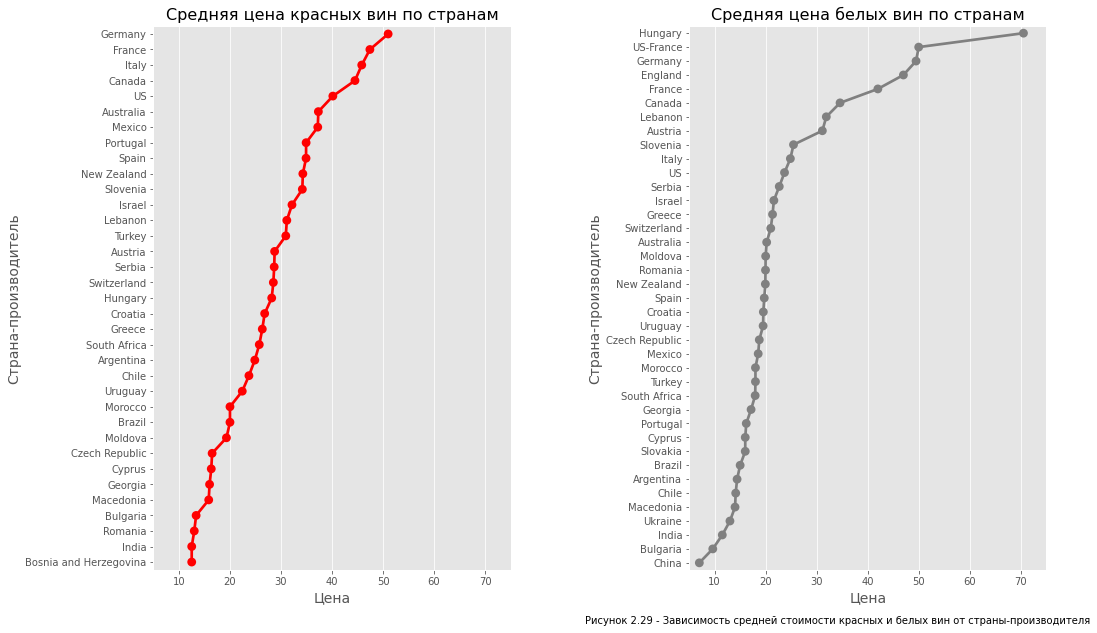

In [91]:
mean_price_red = df.query('color=="red"').groupby('country')['price'].mean().sort_values(ascending=False).to_frame()
mean_price_white = df.query('color=="white"').groupby('country')['price'].mean().sort_values(ascending=False).to_frame()

fig,ax = plt.subplots(1,2,figsize=(16,10))
ax3,ax4 = ax.flatten()

sns.pointplot(x = mean_price_red.price, y = mean_price_red.index, color='red', orient='h',ax=ax3)
ax3.set_title('Средняя цена красных вин по странам',fontsize=16)
ax3.set_ylabel('Страна-производитель',fontsize=14)
ax3.set_xlabel('Цена',fontsize=14)
ax3.set_xlim(5,75)

sns.pointplot(x = mean_price_white.price, y = mean_price_white.index, color='grey', orient='h',ax=ax4)
ax4.set_title('Средняя цена белых вин по странам',fontsize=16)
ax4.set_ylabel('Страна-производитель',fontsize=14)
ax4.set_xlabel('Цена',fontsize=14)
ax4.set_xlim(5,75)
plt.subplots_adjust(wspace=0.5)
plt.figtext(0.5, 0.05, "Рисунок 2.29 - Зависимость средней стоимости красных и белых вин от страны-производителя")

In [92]:
df.query('(color=="red") | (color=="white")').groupby(['country', 'color'])['price'].agg(['max', 'sum', 'count', np.mean,median]).sort_values('mean',ascending=False).nlargest(10,columns='mean').round(0)

,,max,sum,count,mean,median
country,color,,,,,
Hungary,white,764.0,3033.0,43,71.0,26.0
Germany,red,181.0,3672.0,72,51.0,37.0
US-France,white,50.0,50.0,1,50.0,50.0
Germany,white,775.0,38296.0,774,49.0,28.0
France,red,2300.0,148204.0,3125,47.0,25.0
England,white,49.0,94.0,2,47.0,47.0
Italy,red,900.0,217185.0,4739,46.0,35.0
Canada,red,100.0,1869.0,42,44.0,39.0
France,white,1000.0,110321.0,2627,42.0,27.0


Среди топ 10 видов вин по максимальному среднему рейтингу, представительные зхначения получились бы только у стран с большим количеством экземпляров, таких как Франция, Италия, США и Германия.

## Определить, какие сорта вин лидируют по рейтингам

Построим график распределения среднего рейтинга и топ 30 красных и белых сортов винограда. 

In [93]:
df[df['points'] == df['points'].max()]

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
1763,France,"Full of ripe fruit, opulent and concentrated, ...",unknown,100,848.0,Bordeaux,Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion,white,Europe,1
42405,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Cabernet Sauvignon,Shafer,red,North America,1


Text(0.5, 0, 'Рисунок 2.30 - Зависимость среднего рейтинга красных и белых вин от сорта винограда')

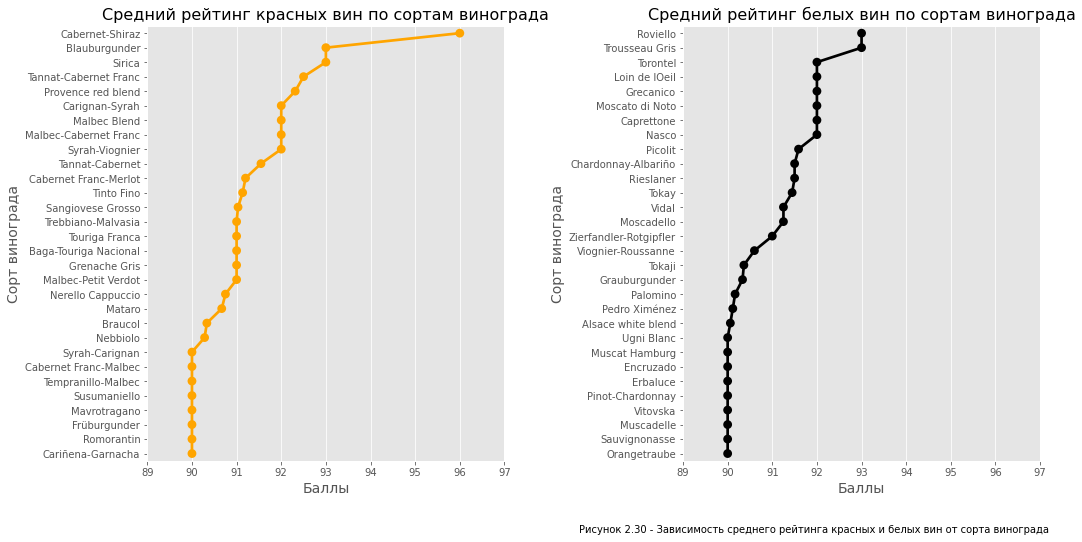

In [94]:
mean_points_red = df.query('color=="red"').groupby('variety')['points'].mean().sort_values(ascending=False).nlargest(30).to_frame()
mean_points_white = df.query('color=="white"').groupby('variety')['points'].mean().sort_values(ascending=False).nlargest(30).to_frame()

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax3,ax4 = ax.flatten()

sns.pointplot(x = mean_points_red.points, y = mean_points_red.index, color='orange', orient='h',ax=ax3)
ax3.set_title('Средний рейтинг красных вин по сортам винограда', fontsize=16)
ax3.set_ylabel('Сорт винограда', fontsize=14)
ax3.set_xlabel('Баллы', fontsize=14)
ax3.set_xlim(89,97)

sns.pointplot(x = mean_points_white.points, y = mean_points_white.index, color='black', orient='h',ax=ax4)
ax4.set_title('Средний рейтинг белых вин по сортам винограда', fontsize=16)
ax4.set_ylabel('Сорт винограда', fontsize=14)
ax4.set_xlabel('Баллы', fontsize=14)
ax4.set_xlim(89,97)
plt.subplots_adjust(wspace=0.5)
plt.figtext(0.5, 0, "Рисунок 2.30 - Зависимость среднего рейтинга красных и белых вин от сорта винограда")

In [95]:
df.groupby(['variety','color']).points.mean().sort_values(ascending=False).nlargest(2).round(1)

variety          color
Cabernet-Shiraz  red      96.0
Roviello         white    93.0
Name: points, dtype: float64

Самым высоким средним рейтингом обладают красный Cabernet-Shiraz и белый Roviello сорта винограда.

In [96]:
df.query('points==100')

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,rating
1763,France,"Full of ripe fruit, opulent and concentrated, ...",unknown,100,848.0,Bordeaux,Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion,white,Europe,1
42405,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Stags Leap District,Cabernet Sauvignon,Shafer,red,North America,1


Самым высоким рейтингом в абсолютном выражении (100 баллов) удостоены красный Cabernet Sauvignon и белый Bordeaux-style White Blend сорта винограда.

## Построить график «ящик с усами» по рейтингам в разбивке по странам

In [97]:
top_country_wines = df.groupby(['country'])['points'].agg(['max', 'sum', 'count', np.mean]).sort_values('mean',ascending=False).nlargest(10,columns='mean')
top_country_wines

,max,sum,count,mean
country,,,,
England,94,742,8,92.750000
Austria,98,83019,927,89.556634
India,91,537,6,89.500000
Canada,93,9917,111,89.342342
Germany,97,75598,847,89.253837
Hungary,95,5083,57,89.175439
France,100,602462,6794,88.675596
Italy,99,622732,7034,88.531703
Morocco,93,884,10,88.400000


Text(0.5, 0, 'Рисунок 2.31 - Распределение рейтинга по топ 10 популярным странам')

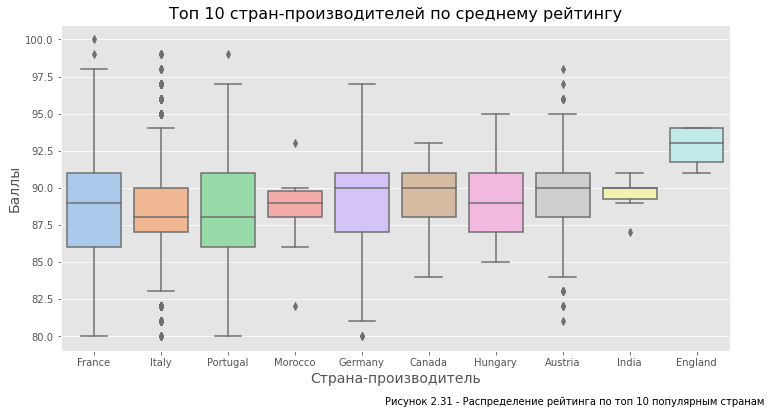

In [98]:
fig = plt.figure(figsize=(12,6))

points_top_country_wines = df[df.country.isin(top_country_wines.index)]
x = points_top_country_wines.country
y = points_top_country_wines.points
sns.boxplot(x,y, palette='pastel')
plt.xlabel('Страна-производитель', fontsize=14)
plt.ylabel('Баллы', fontsize=14)
plt.title('Топ 10 стран-производителей по среднему рейтингу',fontsize=16)
plt.figtext(0.5, 0, "Рисунок 2.31 - Распределение рейтинга по топ 10 популярным странам" )

Судя по графику, наиболее высокими средними и медианными баллами обладают английские вина. При этом, отметим что Англия преставлена в выборке всего 8 экземплярами вин. На 3 месте расположилась Индия с количеством вин всего 6 видов. В то же время Италия, к примеру, изготовляет свыше 7 тыс разновидностей вин.

## Построить график «ящик с усами» по рейтингам в разбивке по сортам вин

Text(0.45, -0.3, 'Рисунок 2.32 - Распределение рейтинга по 10 популярным сортам винограда')

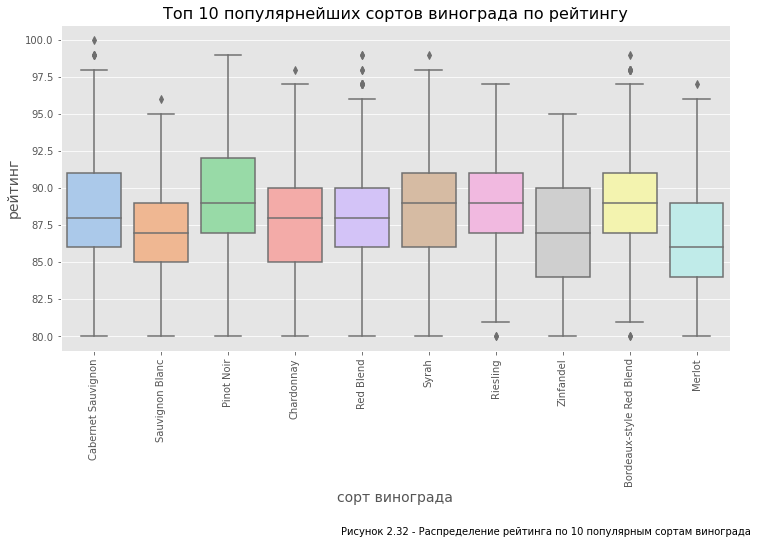

In [99]:
fig = plt.figure(figsize=(12,6))
top_reviewed_wines = df.variety.value_counts().head(10)
points_top_reviewed_wines = df[df.variety.isin(top_reviewed_wines.index)]
x = points_top_reviewed_wines.variety
y = points_top_reviewed_wines.points
sns.boxplot(x,y, palette='pastel')
plt.xlabel('сорт винограда', fontsize=14)
plt.ylabel('рейтинг', fontsize=14)
plt.xticks(rotation=90)
plt.title('Топ 10 популярнейших сортов винограда по рейтингу',fontsize=16)
plt.figtext(0.45, -0.3, "Рисунок 2.32 - Распределение рейтинга по 10 популярным сортам винограда" )

In [100]:
df.groupby(['variety', 'color'])['points'].agg(['count', 'max', 'median', np.mean, 'min']).sort_values('count',ascending=False).nlargest(10,columns='count')

,,count,max,median,mean,min
variety,color,,,,,
Pinot Noir,red,5250,99,89.0,89.010095,80
Chardonnay,white,4945,98,88.0,87.833569,80
Cabernet Sauvignon,red,4840,100,88.0,88.387397,80
Red Blend,red,3656,99,88.0,88.135667,80
Sauvignon Blanc,white,2292,96,87.0,86.942845,80
Bordeaux-style Red Blend,red,2273,99,89.0,88.976683,80
Syrah,red,2021,99,89.0,88.540327,80
Riesling,white,1996,97,89.0,89.108717,80
Merlot,red,1744,97,86.0,86.501147,80


Данная диаграмма размаха отражает распределение баллов рейтинга по наиболее популярным сортам винограда. Наиболее титулованным оказался сорт "Cabernet Sauvignon", который занимает 3 место по популярности. Самым популярным в мире и в среднем самым титулованным (среди топ 10 сортов) оказался красный сорт Pinot Noir. Второе место занимает белый сорт Chardonnay.

## Выявить закономерность влияния на цену рейтинга вина

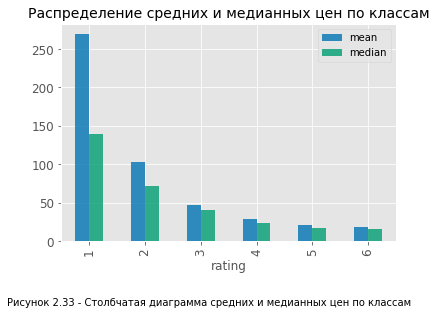

In [101]:
from statistics import median
rating = df.groupby('rating')['price'].agg([np.mean, median])

rating.plot.bar(alpha=0.8)
plt.title('Распределение средних и медианных цен по классам', size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0, -0.1, "Рисунок 2.33 - Столбчатая диаграмма средних и медианных цен по классам" )
plt.show()

#### Построим гистограммы распределения цен вин по каждому классу рейтинга (кроме 1го, который не является репрезентативным) и оценим их:

In [102]:
df_t = df.loc[df.price <= 116,:].copy()

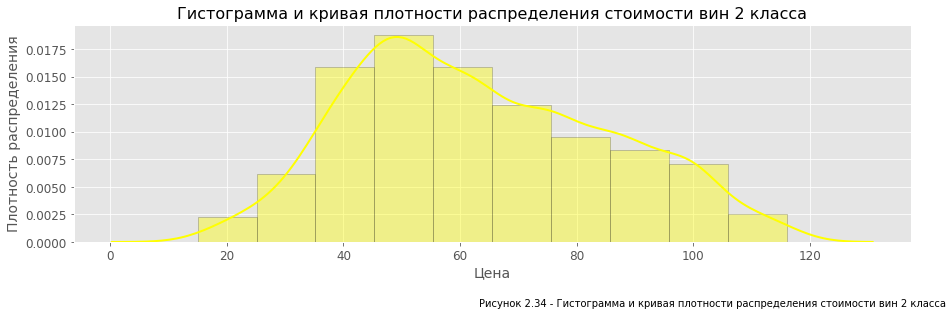

In [103]:
plt.figure(figsize=(15, 4))
sns_plot = sns.distplot(df_t.query('rating=="2"')['price'], hist=True, kde=True,
             color = 'yellow', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма и кривая плотности распределения стоимости вин 2 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.5, -0.1, "Рисунок 2.34 - Гистограмма и кривая плотности распределения стоимости вин 2 класса")
plt.show() 

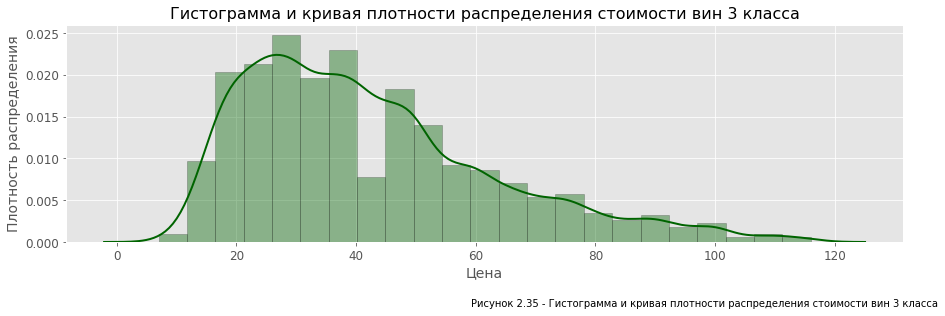

In [104]:
plt.figure(figsize=(15, 4))
sns_plot = sns.distplot(df_t.query('rating=="3"')['price'], hist=True, kde=True,
             color = 'darkgreen', 
             bins=23, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма и кривая плотности распределения стоимости вин 3 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.5, -0.1, "Рисунок 2.35 - Гистограмма и кривая плотности распределения стоимости вин 3 класса")
plt.show() 

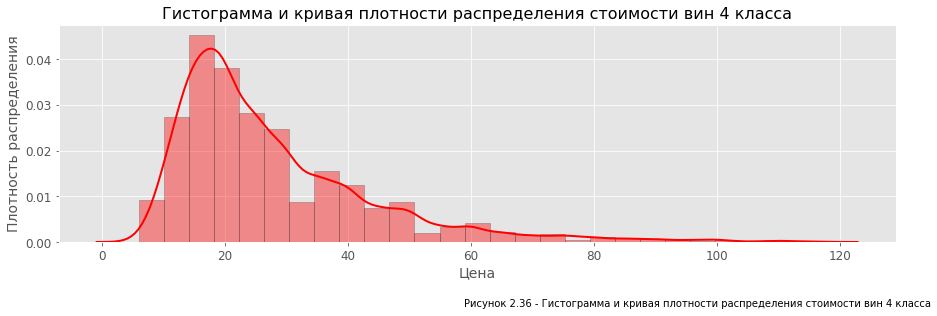

In [105]:
plt.figure(figsize=(15, 4))
sns_plot = sns.distplot(df_t.query('rating=="4"')['price'], hist=True, kde=True,
             color = 'red', 
             bins=27, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма и кривая плотности распределения стоимости вин 4 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.5, -0.1, "Рисунок 2.36 - Гистограмма и кривая плотности распределения стоимости вин 4 класса")
plt.show() 

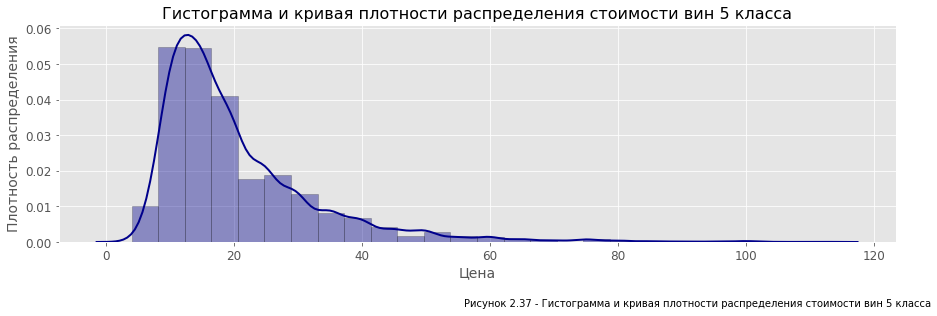

In [106]:
plt.figure(figsize=(15, 4))
sns_plot = sns.distplot(df_t.query('rating=="5"')['price'], hist=True, kde=True,
             color = 'darkblue', 
             bins=26, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма и кривая плотности распределения стоимости вин 5 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.5, -0.1, "Рисунок 2.37 - Гистограмма и кривая плотности распределения стоимости вин 5 класса")
plt.show() 

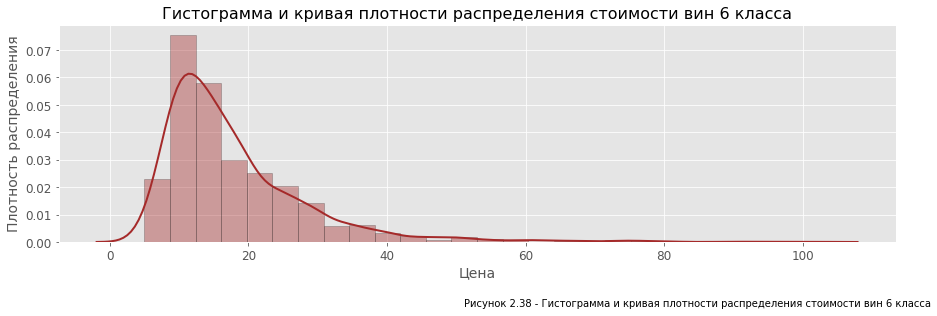

In [107]:
plt.figure(figsize=(15, 4))
sns_plot = sns.distplot(df_t.query('rating=="6"')['price'], hist=True, kde=True,
             color = 'brown', 
             bins=26, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма и кривая плотности распределения стоимости вин 6 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.5, -0.1, "Рисунок 2.38 - Гистограмма и кривая плотности распределения стоимости вин 6 класса")
plt.show() 

## Выявить закономерность влияния на цену цвета и рейтинга вина

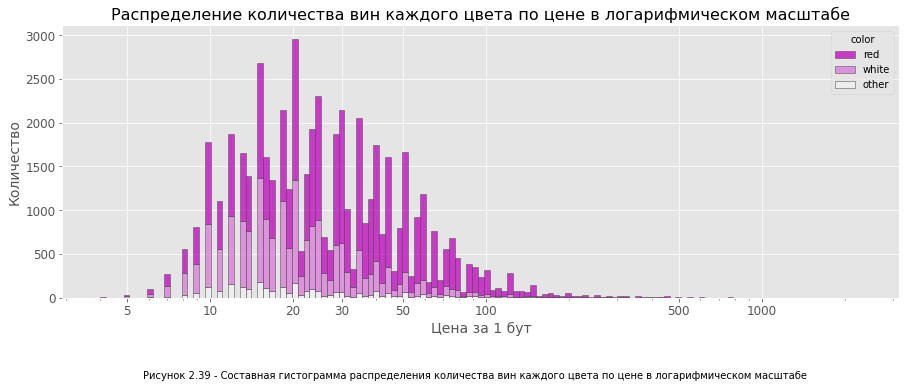

In [108]:
import matplotlib as mpl
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.histplot(
    df,
    x="price", hue="color",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5, 10, 20, 30, 50, 100, 500, 1000], fontsize=12)
plt.title('Распределение количества вин каждого цвета по цене в логарифмическом масштабе',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена за 1 бут', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.figtext(0.2, -0.1, "Рисунок 2.39 - Составная гистограмма распределения количества вин каждого цвета по цене в логарифмическом масштабе")
plt.show()

In [109]:
df.query('(color=="red") | (color=="white")').groupby(['rating','color'])['price'].describe()

count        mean         std   min    25%    50%    75%  \
rating color                                                               
1      red       50.0  267.800000  399.582946  50.0  91.00  139.0  300.0   
       white      4.0  361.750000  356.724333  86.0  98.75  256.5  519.5   
2      red     1715.0  104.099708  103.534593  20.0  53.50   75.0  110.0   
       white    544.0   97.648897  122.570970  15.0  44.00   60.0   90.0   
3      red    10901.0   50.146409   34.298448   8.0  30.00   43.0   60.0   
       white   4519.0   37.723390   42.234558   7.0  21.50   30.0   44.0   
4      red    10626.0   32.241013   22.106075   6.0  19.00   27.0   40.0   
       white   5835.0   22.395716   12.471821   6.0  15.00   19.0   25.0   
5      red     8954.0   23.264463   15.328947   4.0  13.00   19.0   29.0   
       white   5514.0   17.035546    9.408799   4.0  12.00   15.0   20.0   
6      red     1403.0   19.449038   12.880973   5.0  11.00   16.0   24.0   
       white    648.0   15.368827    7.678112   5.0  10.00   14.0   18.0   

                 max  
rating color          
1      red    2300.0  
       white   848.0  
2      red    1300.0  
       white  1100.0  
3      red     770.0  
       white  2013.0  
4      red     500.0  
       white   250.0  
5      red     200.0  
       white   320.0  
6      red     150.0  
       white    75.0

<Figure size 1080x432 with 0 Axes>

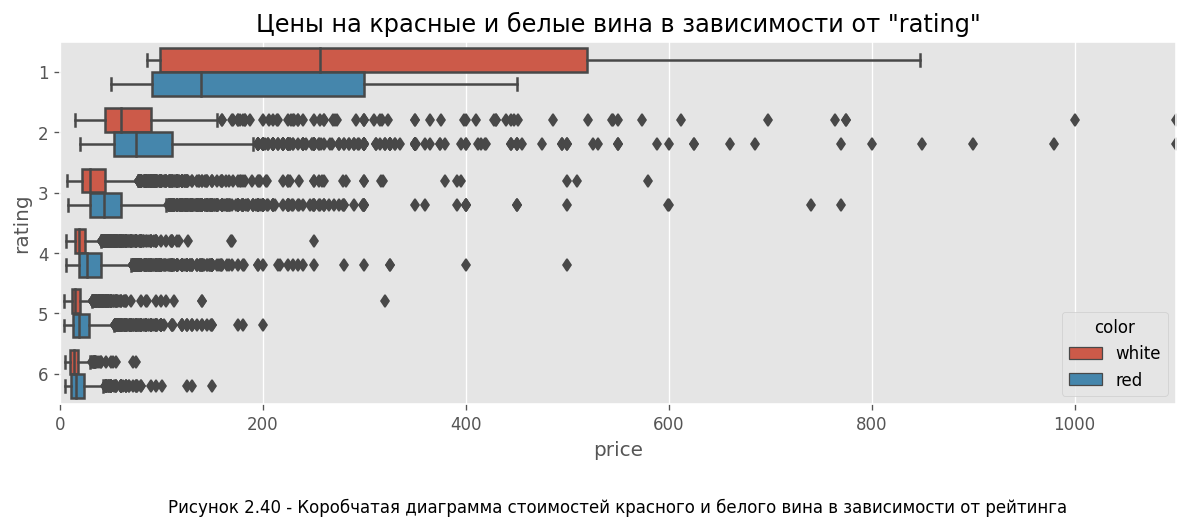

In [110]:
fig = plt.figure(figsize=(15,6))
plt.subplots(figsize=(12,4), dpi=120)
sns.boxplot(
    x='price',
    y='rating',
    data=df.query('color in ("white","red")').sort_values('rating'),
    hue = 'color',
    orient="h"
)
plt.title('Цены на красные и белые вина в зависимости от "rating"')
plt.xlim(0,1100)
plt.figtext(0.2, -0.1, "Рисунок 2.40 - Коробчатая диаграмма стоимостей красного и белого вина в зависимости от рейтинга" )
plt.show()

Данный график отчетливо иллюстрирует как сильно меняется цена красных и белых вин в зависимости от рейтинга. В среднем, для всех классов (кроме 1го) красные вина дороже белых. А также, чем выше класс, тем больше мединная стоимость и размах цен.

#### Построим гистограммы распределения цен на белые и красные вина по классам рейтинга:

In [111]:
df_t = df.loc[df.price <= 116,:].copy()

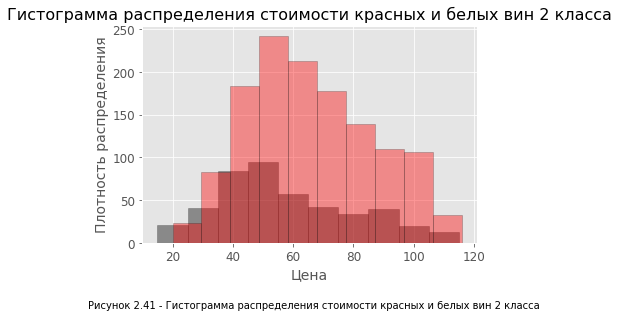

In [112]:
fig, ax = plt.subplots()
ax = sns.distplot(df_t.query('(rating=="2")&(color=="white")')['price'], hist=True, kde=False,
             color = 'black', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5}) 
ax = sns.distplot(df_t.query('(rating=="2")&(color=="red")')['price'], hist=True, kde=False,
             color = 'red', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}) 
plt.title('Гистограмма распределения стоимости красных и белых вин 2 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0, -0.1, "Рисунок 2.41 - Гистограмма распределения стоимости красных и белых вин 2 класса")              
plt.show()

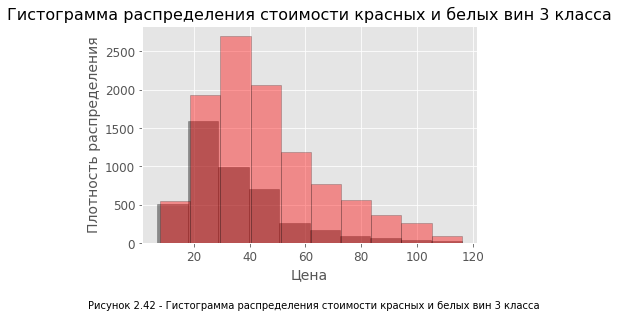

In [113]:
fig, ax = plt.subplots()
ax = sns.distplot(df_t.query('(rating=="3")&(color=="white")')['price'], hist=True, kde=False,
             color = 'black', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5}) 
ax = sns.distplot(df_t.query('(rating=="3")&(color=="red")')['price'], hist=True, kde=False,
             color = 'red', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}) 
plt.title('Гистограмма распределения стоимости красных и белых вин 3 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0, -0.1, "Рисунок 2.42 - Гистограмма распределения стоимости красных и белых вин 3 класса")              
plt.show()

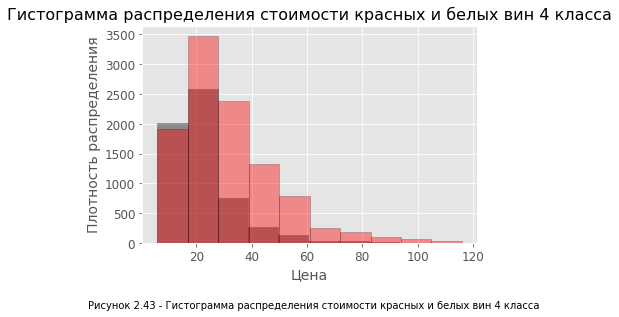

In [114]:
fig, ax = plt.subplots()
ax = sns.distplot(df_t.query('(rating=="4")&(color=="white")')['price'], hist=True, kde=False,
             color = 'black', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5}) 
ax = sns.distplot(df_t.query('(rating=="4")&(color=="red")')['price'], hist=True, kde=False,
             color = 'red', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}) 
plt.title('Гистограмма распределения стоимости красных и белых вин 4 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0, -0.1, "Рисунок 2.43 - Гистограмма распределения стоимости красных и белых вин 4 класса")              
plt.show()

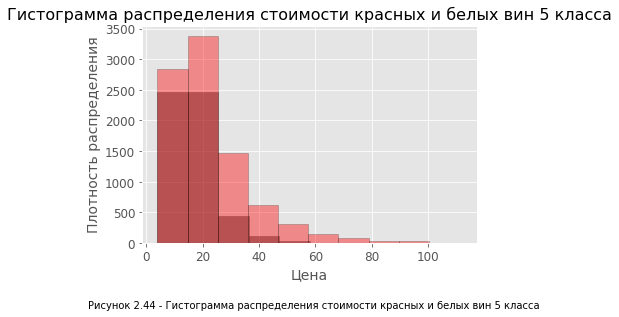

In [115]:
fig, ax = plt.subplots()
ax = sns.distplot(df_t.query('(rating=="5")&(color=="white")')['price'], hist=True, kde=False,
             color = 'black', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5}) 
ax = sns.distplot(df_t.query('(rating=="5")&(color=="red")')['price'], hist=True, kde=False,
             color = 'red', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}) 
plt.title('Гистограмма распределения стоимости красных и белых вин 5 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0, -0.1, "Рисунок 2.44 - Гистограмма распределения стоимости красных и белых вин 5 класса")              
plt.show()

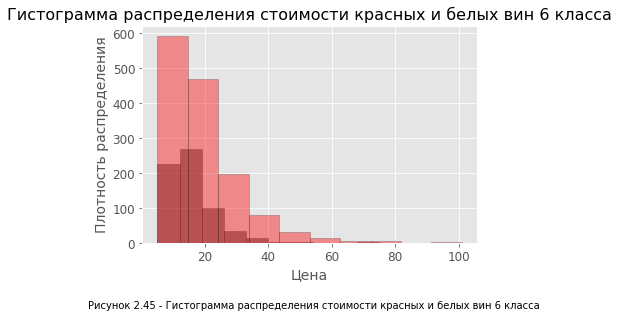

In [116]:
fig, ax = plt.subplots()
ax = sns.distplot(df_t.query('(rating=="6")&(color=="white")')['price'], hist=True, kde=False,
             color = 'black', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5}) 
ax = sns.distplot(df_t.query('(rating=="6")&(color=="red")')['price'], hist=True, kde=False,
             color = 'red', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}) 
plt.title('Гистограмма распределения стоимости красных и белых вин 6 класса', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0, -0.1, "Рисунок 2.45 - Гистограмма распределения стоимости красных и белых вин 6 класса")              
plt.show()

Вывод: распределения цен на вина 2го и 3го класса можно условно принять как симметричные, возможно нормальные. Распределения 4го, 5го и 6го классов скошенные и усеченные слева.

## ВЫВОДЫ
- в US (континент North America) производят наибольшее количество (45%) вин;
- соответственно самая популярная провинция - американская California;
- самый популярный сорт винограда Pinot Noir (составляет 9.8% среди всех представленных сортов);
- баллы рейтинга имеют практически симметричное распределение;
- распределение цен имеет явно выраженный положительный перекос, имеются значительные статистические выбросы;
- создан новый столбец "rating", где каждое вино отнесено к определенному классу (от 1 - самых лучших до 6 - приемлемых) в зависимости от рейтинга;
- большую часть рынка (67%) винной продукции рынка занимают красные вина, треть - белые и только 5% - прочие разновидности;
- при прочих равных условиях, признаки 'designation'  и 'region_1' могут быть определяющими цену факторами;
- красный сорт винограда Pinot Noir является самым распространенным сортом винограда, следом, с небольшим отрывом расположились белый Chardonnay и красный Cabernet Savignon.
-Среди 382 провинций, по популярности с большим отрывом лидирует американская провинция California;
- большим разнообразием и в среднем высокими ценами характеризуются вина, выпущенные американскими винодельнями;
-каждая страна предпочитает свой сорт винограда для вин. По видимому, большой популярностью вино Пино Нуар обязаноамериканскому рынку (там производят почти 4 тыс его видов).
- Самое дорогое красное вино производят из сорта винограда Bordeaux-style Red Blend, белое из сорта Chardonnay;
- Среди красных вин наиболее популярными в бюджетном сегменте является испанский сорт Tempranillo-Garnacha, среди белых - преимущественно аргентинский Torrontés;
- Самым высоким рейтингом в абсолютном выражении (100 баллов) удостоены красный Cabernet Sauvignon и белый Bordeaux-style White Blend сорта винограда.

#  <a name="3">3. Составление структуры развития рынка вина регионов</a>

#### ЗАДАЧИ:
Определить для пользователя каждого региона:
* Самые популярные сорта винограда (топ-5)
* Влияет ли рейтинг на цены по регионам

#### Определим топ 5 сортов винограда:

In [117]:
pop_var = df_t['variety'].value_counts().nlargest(5)
pop_var

Pinot Noir            5122
Chardonnay            4858
Cabernet Sauvignon    4610
Red Blend             3579
Sauvignon Blanc       2292
Name: variety, dtype: int64

#### Подробней остановимся на первых 3 сортах и посмотрим как рейтинг влияет на цены вин в разных странах.

#### PINOT NOIR

Text(0, -0.3, 'Рисунок 3.1 - Столбчатая диаграмма доли рынка вин Pinot Noir по топ 5 странам')

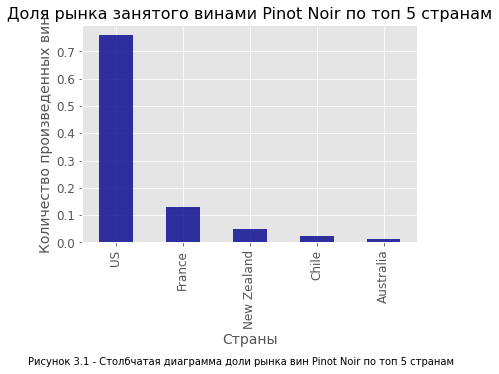

In [118]:
df.query('variety=="Pinot Noir"')['country'].value_counts(normalize=True).nlargest(5).plot.bar(alpha=0.8, color='darkblue')
plt.columns = ['country','counts']
plt.title('Доля рынка занятого винами Pinot Noir по топ 5 странам',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Страны',fontsize=14)
plt.ylabel('Количество произведенных вин', fontsize=14)
plt.figtext(0, -0.3, "Рисунок 3.1 - Столбчатая диаграмма доли рынка вин Pinot Noir по топ 5 странам" )

75% мирового рынка производства Pinot Noir занимает США.

Text(0.4, 0, 'Рисунок 3.2 - Точечная диаграма распределения цены и рейтинга сорта Pinot Noir в US')

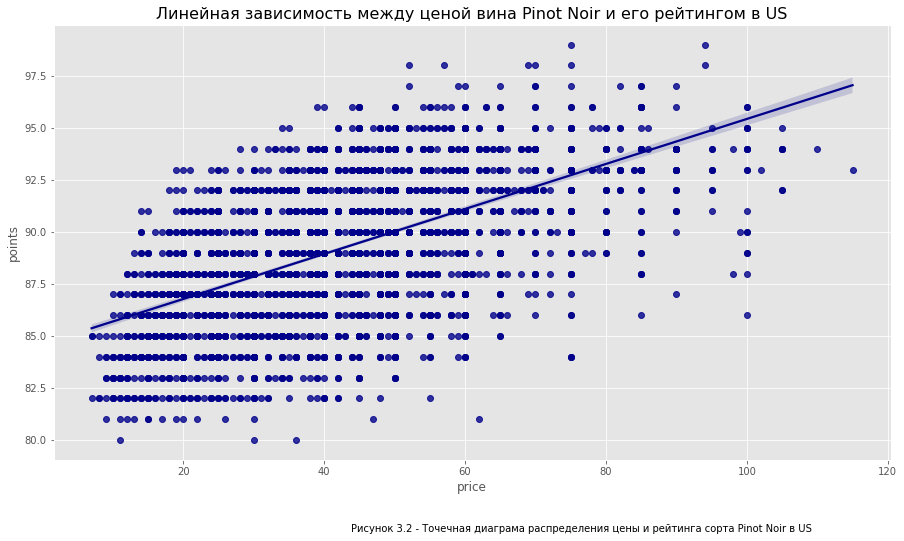

In [119]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="US")&(variety=="Pinot Noir")'), 
    x="price", 
    y="points", 
    color='darkblue'
)
plt.title('Линейная зависимость между ценой вина Pinot Noir и его рейтингом в US',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.2 - Точечная диаграма распределения цены и рейтинга сорта Pinot Noir в US" )

In [120]:
df_t.query('(country=="US")&(variety=="Pinot Noir")').corr().round(2)

,points,price
points,1.00,0.57
price,0.57,1.00


Коэффициент корреляции рейтинга и цене на вина Pinot Noir в США составляет 0.57.

Text(0.4, 0, 'Рисунок 3.3 - Точечная диаграма распределения цены и рейтинга сорта Pinot Noir в France')

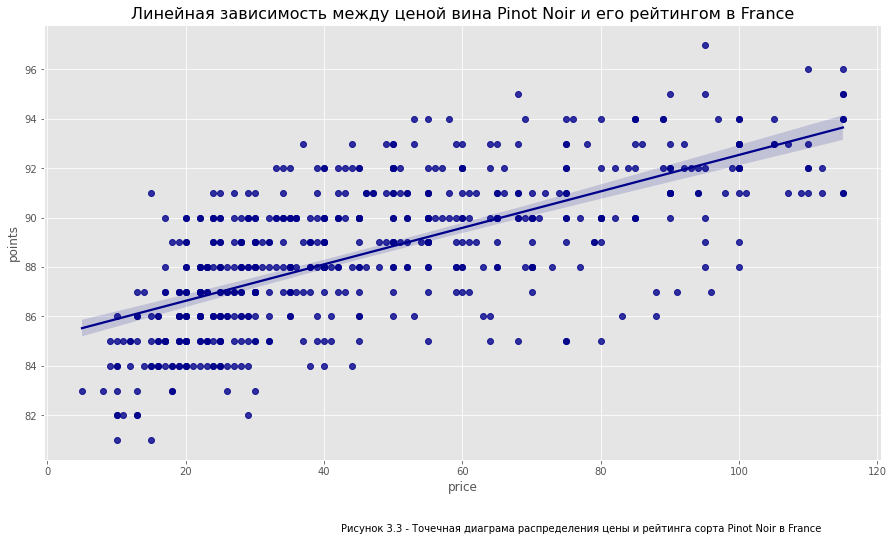

In [121]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="France")&(variety=="Pinot Noir")'), 
    x="price", 
    y="points",
    color='darkblue' 
)
plt.title('Линейная зависимость между ценой вина Pinot Noir и его рейтингом в France',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.3 - Точечная диаграма распределения цены и рейтинга сорта Pinot Noir в France" )

In [122]:
df_t.query('(country=="France")&(variety=="Pinot Noir")').corr().round(2)

,points,price
points,1.00,0.67
price,0.67,1.00


Коэффициент корреляции рейтинга и цене на вина Pinot Noir во Франции составляет 0.67. Это лучше, чем в США.

Text(0.4, 0, 'Рисунок 3.4 - Точечная диаграма распределения цены и рейтинга сорта Pinot Noir в New Zealand')

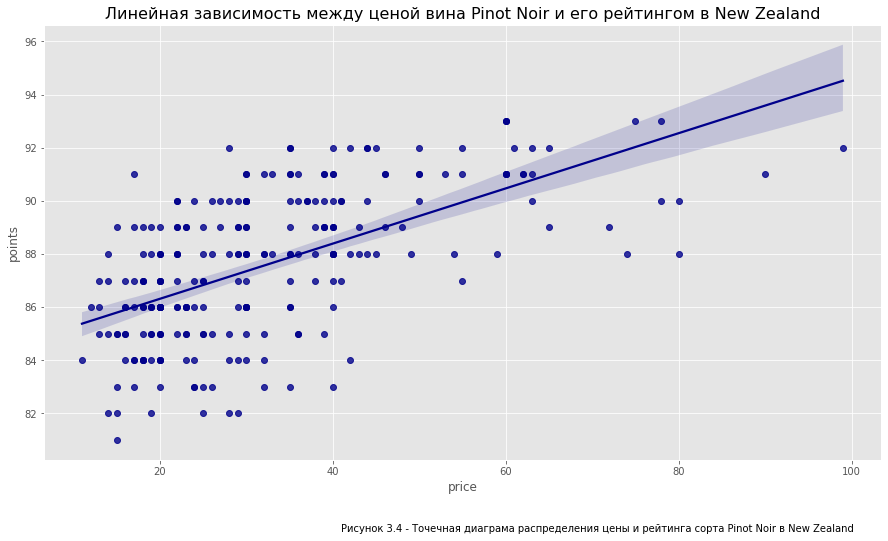

In [123]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="New Zealand")&(variety=="Pinot Noir")'), 
    x="price", 
    y="points", 
    color='darkblue'
)
plt.title('Линейная зависимость между ценой вина Pinot Noir и его рейтингом в New Zealand',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.4 - Точечная диаграма распределения цены и рейтинга сорта Pinot Noir в New Zealand" )

In [124]:
df_t.query('(country=="New Zealand")&(variety=="Pinot Noir")').corr().round(2)

,points,price
points,1.0,0.6
price,0.6,1.0


Коэффициент корреляции рейтинга и цене на вина Pinot Noir в Новой Зеландии составляет 0.60. Это лучше, чем в США, но хуже, чем во Франции.

#### CHARDONNAY

Text(0, -0.3, 'Рисунок 3.5 - Столбчатая диаграмма количества произведенных вин Chardonnay по топ 5 странам')

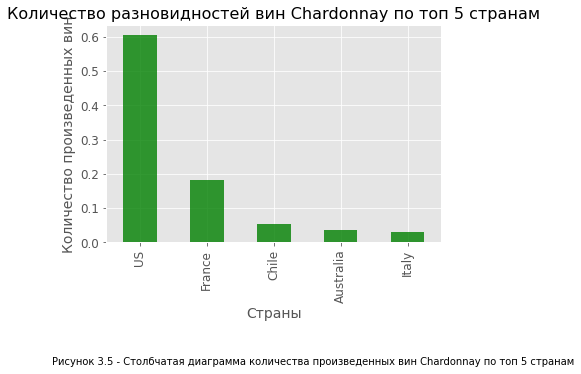

In [125]:
df.query('variety=="Chardonnay"')['country'].value_counts(normalize=True).nlargest(5).plot.bar(color="green", alpha=0.8)
plt.columns = ['country','counts']
plt.title('Количество разновидностей вин Chardonnay по топ 5 странам',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Страны',fontsize=14)
plt.ylabel('Количество произведенных вин', fontsize=14)
plt.figtext(0, -0.3, "Рисунок 3.5 - Столбчатая диаграмма количества произведенных вин Chardonnay по топ 5 странам" )

Почти 60% рынка производства вин Chardonnay снова занимает США (как и в случае с Pinot Noir), далее следует Франция (18%) и на удивление Чили (5.5%).

Text(0.4, 0, 'Рисунок 3.6 - Точечная диаграма распределения цены и рейтинга сорта Chardonnay в US')

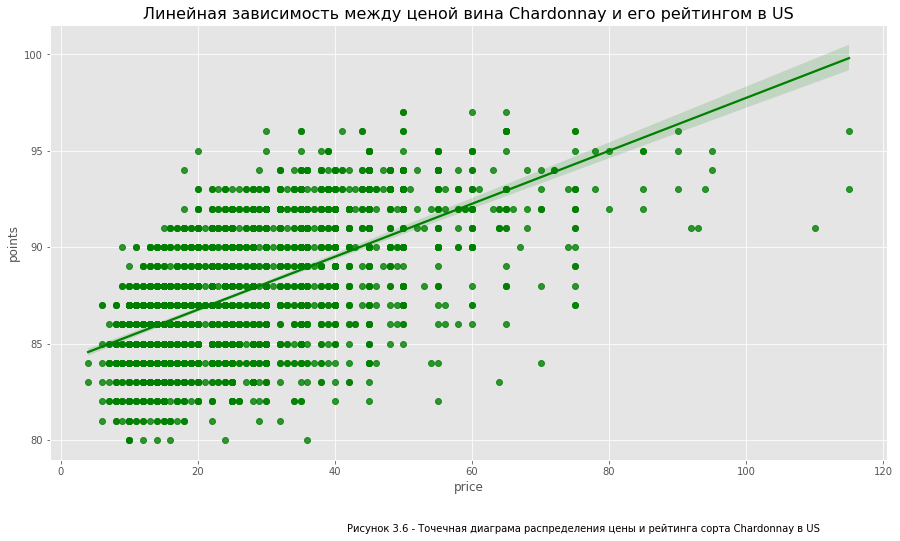

In [126]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="US")&(variety=="Chardonnay")'), 
    x="price", 
    y="points",
    color='green' 
)
plt.title('Линейная зависимость между ценой вина Chardonnay и его рейтингом в US',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.6 - Точечная диаграма распределения цены и рейтинга сорта Chardonnay в US" )

In [127]:
df_t.query('(country=="US")&(variety=="Chardonnay")').corr()

,points,price
points,1.000000,0.591135
price,0.591135,1.000000


Коэффициент корреляции рейтинга и цене на вина Chardonnay в США составляет 0.59. Это значение выше, чем было у Pinot Noir.

Text(0.4, 0, 'Рисунок 3.7 - Точечная диаграма распределения цены и рейтинга сорта Chardonnay в France')

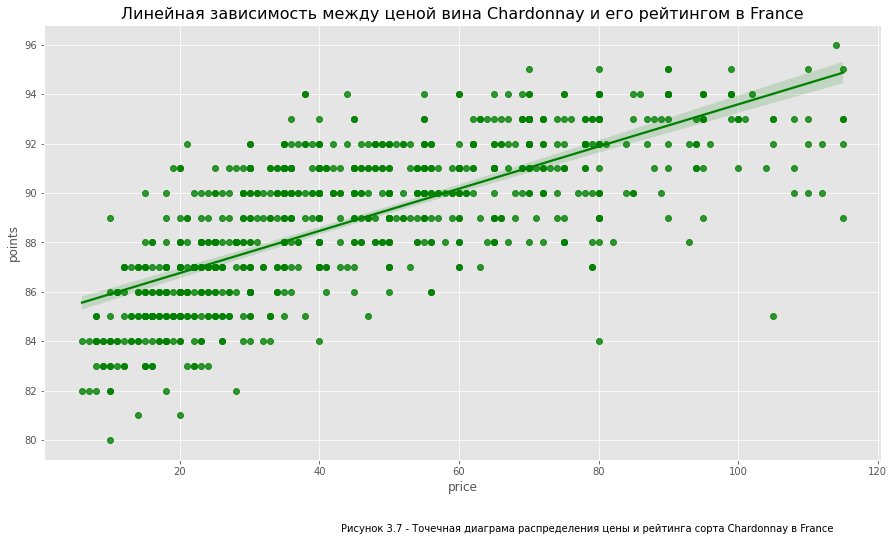

In [128]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="France")&(variety=="Chardonnay")'), 
    x="price", 
    y="points",
    color='green' 
)
plt.title('Линейная зависимость между ценой вина Chardonnay и его рейтингом в France',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.7 - Точечная диаграма распределения цены и рейтинга сорта Chardonnay в France" )

In [129]:
df_t.query('(country=="France")&(variety=="Chardonnay")').corr().round(2)

,points,price
points,1.00,0.72
price,0.72,1.00


Для Франции, родины Шардоне, получили очень хороший коэф.корр 0.72 между ценой и рейтингом.

Text(0, -0.3, 'Рисунок 3.8 - Столбчатая диаграмма количества произведенных вин Cabernet Sauvignon по топ 5 странам')

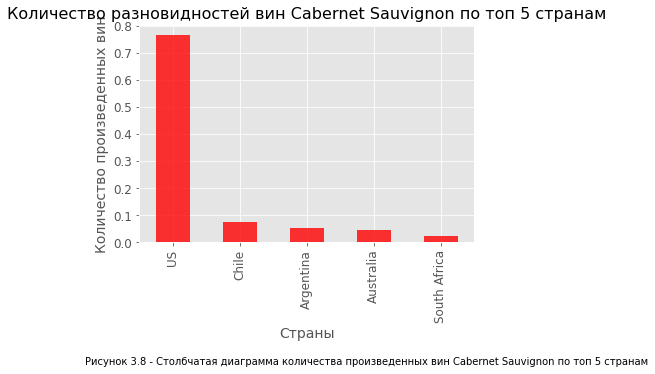

In [130]:
df.query('variety=="Cabernet Sauvignon"')['country'].value_counts(normalize=True).nlargest(5).plot.bar(color="red", alpha=0.8)
plt.columns = ['country','counts']
plt.title('Количество разновидностей вин Cabernet Sauvignon по топ 5 странам',fontsize=16)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Страны',fontsize=14)
plt.ylabel('Количество произведенных вин', fontsize=14)
plt.figtext(0, -0.3, "Рисунок 3.8 - Столбчатая диаграмма количества произведенных вин Cabernet Sauvignon по топ 5 странам" )

Видимо, в следствии огромного разнообразия производимых разновидностей вин, США в очередной раз занимает существенную долю рынка (75%) вин Cabernet Sauvignon

Text(0.4, 0, 'Рисунок 3.9 - Точечная диаграма распределения цены и рейтинга сорта Cabernet Sauvignon в US')

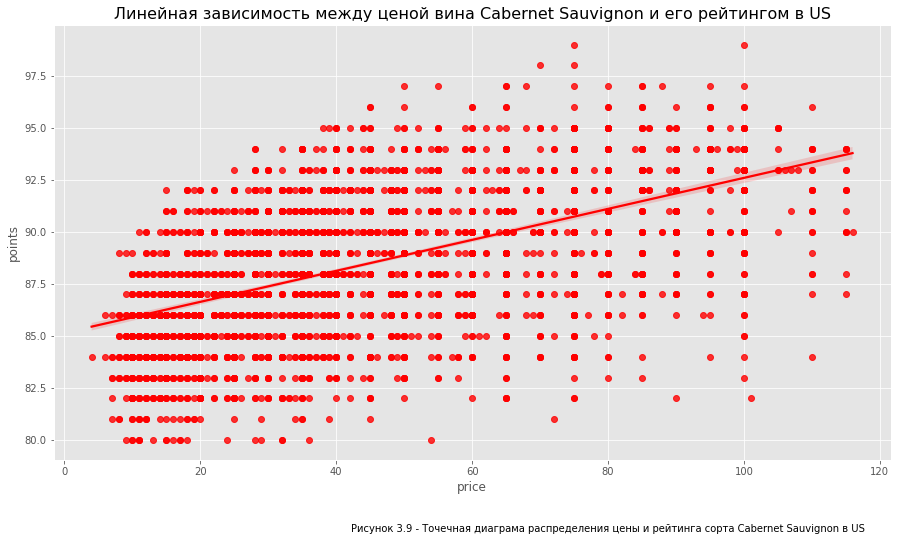

In [131]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="US")&(variety=="Cabernet Sauvignon")'), 
    x="price", 
    y="points",
    color='red' 
)
plt.title('Линейная зависимость между ценой вина Cabernet Sauvignon и его рейтингом в US',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.9 - Точечная диаграма распределения цены и рейтинга сорта Cabernet Sauvignon в US" )

In [132]:
df_t.query('(country=="US")&(variety=="Cabernet Sauvignon")').corr()

,points,price
points,1.000000,0.533994
price,0.533994,1.000000


Text(0.4, 0, 'Рисунок 3.10 - Точечная диаграма распределения цены и рейтинга сорта Cabernet Sauvignon в Chile')

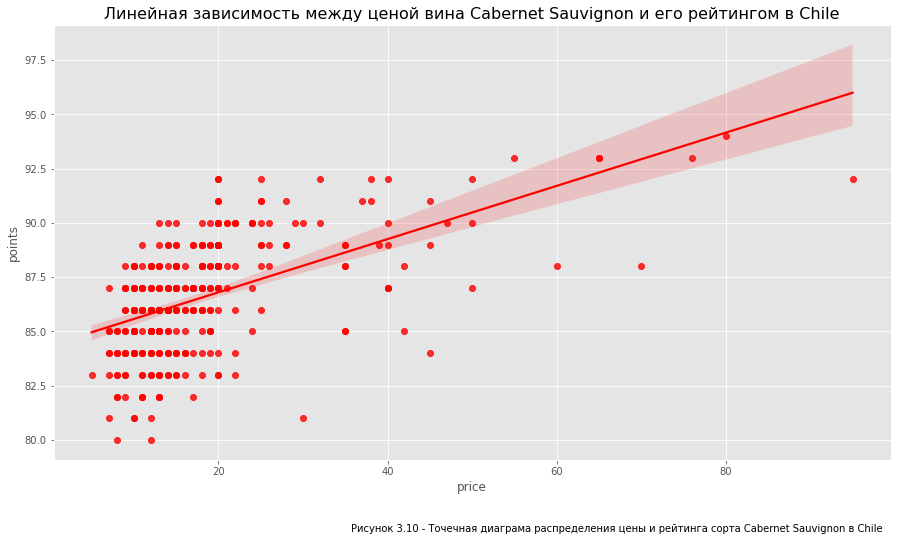

In [133]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="Chile")&(variety=="Cabernet Sauvignon")'), 
    x="price", 
    y="points",
    color='red' 
)
plt.title('Линейная зависимость между ценой вина Cabernet Sauvignon и его рейтингом в Chile',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.10 - Точечная диаграма распределения цены и рейтинга сорта Cabernet Sauvignon в Chile" )

In [134]:
df_t.query('(country=="Chile")&(variety=="Cabernet Sauvignon")').corr()


,points,price
points,1.000000,0.555231
price,0.555231,1.000000


Text(0.4, 0, 'Рисунок 3.11 - Точечная диаграма распределения цены и рейтинга сорта Cabernet Sauvignon в Argentina')

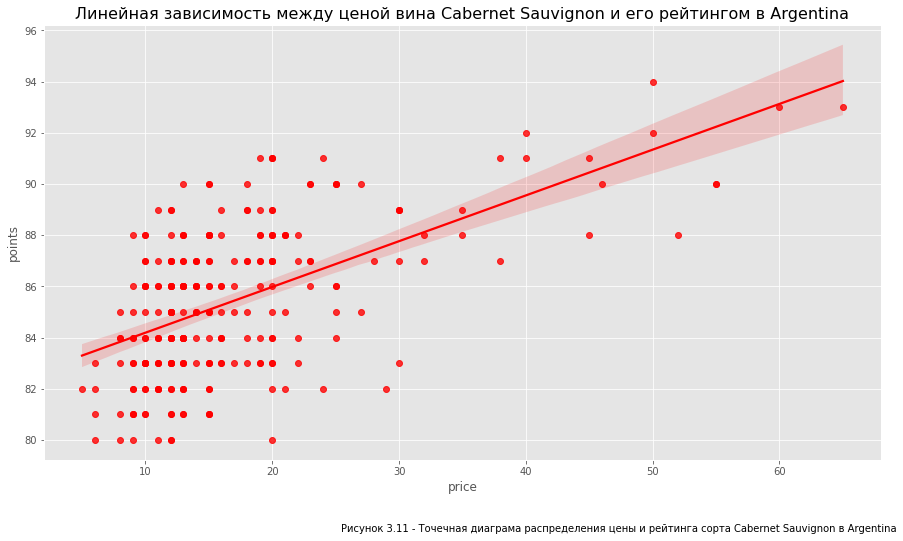

In [135]:
plt.figure(figsize=(15, 8))
sns.regplot(
    data=df_t.query('(country=="Argentina")&(variety=="Cabernet Sauvignon")'), 
    x="price", 
    y="points",
    color='red' 
)
plt.title('Линейная зависимость между ценой вина Cabernet Sauvignon и его рейтингом в Argentina',fontsize=16)
plt.figtext(0.4,0, "Рисунок 3.11 - Точечная диаграма распределения цены и рейтинга сорта Cabernet Sauvignon в Argentina" )

In [136]:
df_t.query('(country=="Argentina")&(variety=="Cabernet Sauvignon")').corr()

,points,price
points,1.000000,0.580198
price,0.580198,1.000000


Для вин произведенных из сорта винограда Cabernet Sauvignon, наилучшая корреляция цен-рейтинга отмечается в Аргентине.

#### Выводы:
-  в топ 5 популярнейших сортов винограда входят: Pinot Noir, Chardonnay, Cabernet Sauvignon, Red Blend и Sauvignon Blanc;
- 75% всех вин Pinot Noir производят в США;
- рейтинг производимых вин по разному влияет на цены в зависимости от страны.

#  <a name="4"> 4. Исследование статистических показателей зависимости цены вина от рейтинга в регионе</a>

Вспомним, что распределение цен всего имеющегося набора вин является нессиметричным и сильно скошенным вправо. Это происходит из-за наличия в данных статистических выбросов. Попробуем получить относительно нормальные сет цен для построения наиболее правдоподобной регрессионной модели.

Посмотрим на статистику цен в разбивке на классы рейтинга, так мы увидим в каких интервалах цен лежит основная масса наблюдений:

In [137]:
df.groupby('rating')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,56.0,269.535714,388.002997,50.0,93.0,139.0,304.75,2300.0
2,2329.0,102.689137,107.472871,15.0,50.0,71.0,105.00,1300.0
3,16076.0,46.553371,37.257600,7.0,26.0,40.0,55.00,2013.0
4,17325.0,28.604964,19.742028,6.0,17.0,23.0,35.00,500.0
5,15362.0,20.732327,14.228966,4.0,12.0,17.0,25.00,495.0
6,2158.0,18.068582,11.521882,5.0,11.0,15.0,22.00,150.0


Напомню, что к 1 классу мы относим самые титулованные и дорогие экземпляры вин. Так что не удивительно, что 75-квартиль здесь составляет 305. Цены основной массы вин прочих групп не превышают 105.

In [138]:
round(df.price.mean() + df.price.std() * 2,0)

116.0

Статистически 95% всех цен сосредоточены в пределах 2 сигм, так что для целей линейной регрессии отберем наблюдения со значениями цен не выше 116$/бут. Создадим переменную, куда запишем полученные значения баллов и рейтинга.

In [139]:
df_test = df.loc[df.price <= 116,['price','points']].copy()

In [140]:
print(f'Для дальнейших исследований мы избавились от {round((df.shape[0]-df_test.shape[0])/df.shape[0]*100,0)}% данных, которые считаем выбросами.')

Для дальнейших исследований мы избавились от 2.0% данных, которые считаем выбросами.


Посмотрим какое распределение цен при этом получается:

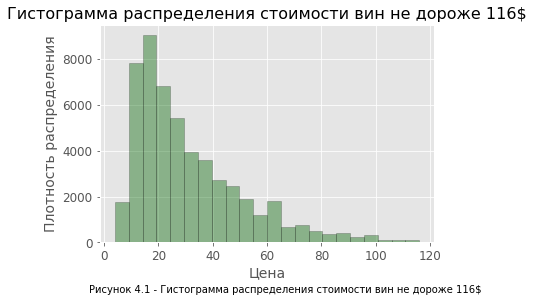

In [141]:
#plt.figure(figsize=(28, 6))
sns_plot = sns.distplot(df.query('price<=116')['price'], hist=True, kde=False,
             color = 'darkgreen', 
             bins=22, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма распределения стоимости вин не дороже 116$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.1, -0.05, "Рисунок 4.1 - Гистограмма распределения стоимости вин не дороже 116$")
plt.show() 

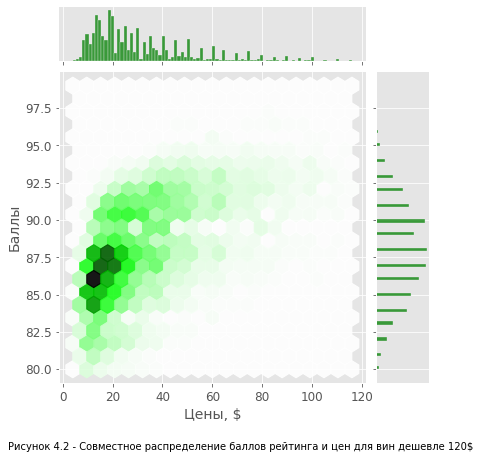

In [142]:
sns.jointplot(x='price', y='points', data=df[df['price'] <= 116], kind='hex', 
              gridsize=20, color='green', alpha=0.9)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цены, $', fontsize=14)
plt.ylabel('Баллы', fontsize=14)
plt.figtext(0, -0.05, "Рисунок 4.2 - Совместное распределение баллов рейтинга и цен для вин дешевле 120$")
plt.show()              

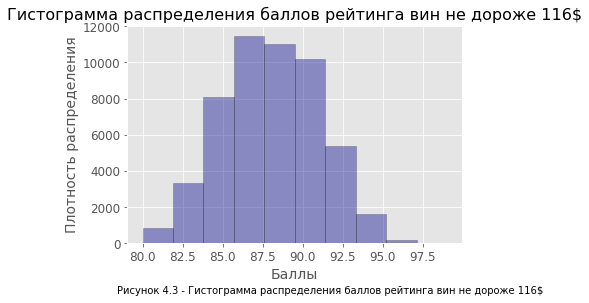

In [143]:
#plt.figure(figsize=(28, 6))
sns_plot = sns.distplot(df.query('price<=116')['points'], hist=True, kde=False,
             color = 'darkblue', 
             bins=10, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})             
plt.title('Гистограмма распределения баллов рейтинга вин не дороже 116$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Баллы', fontsize=14)
plt.ylabel('Плотность распределения', fontsize=14)
plt.figtext(0.1, -0.05, "Рисунок 4.3 - Гистограмма распределения баллов рейтинга вин не дороже 116$")
plt.show() 

После усечения данных по отметке 116$ получили по прежнему нормальное распределение баллов рейтинга.

Text(0, -0.05, 'Рисунок 4.4 - График зависимости рейтинга от цены для вин не дороже 116$')

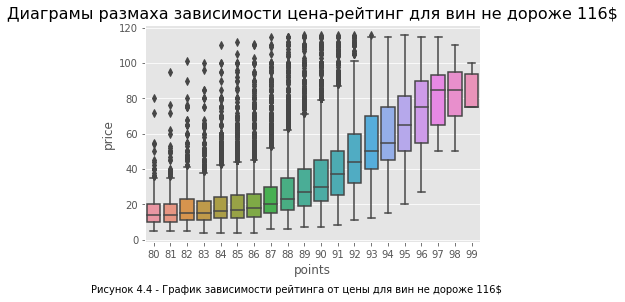

In [144]:
sns.boxplot(x = 'points', y = 'price', data = df_test)
plt.title('Диаграмы размаха зависимости цена-рейтинг для вин не дороже 116$', fontsize=16)
plt.figtext(0, -0.05, "Рисунок 4.4 - График зависимости рейтинга от цены для вин не дороже 116$" )

Получили достаточно хорошую прямую взаимосвязь: чем выше рейтинг, тем выше и цена.

Посчитаем какой при этом получился коэффициент корреляции:

In [145]:
print(f'Коэф.корр. между рейтингом и ценами в обычной шкале: {df_test.points.corr(df_test.price).round(2)}')
print(f'Коэф.корр. между рейтингом и ценами в логарифмической шкале: {df_test.points.corr(np.log(df_test.price)).round(2)}')

Коэф.корр. между рейтингом и ценами в обычной шкале: 0.55
Коэф.корр. между рейтингом и ценами в логарифмической шкале: 0.58


Коэфф.корр. для цен в логарифмической шкале получился выше (0.58), так что примем его для построения модели.

In [146]:
from sklearn.datasets import load_boston
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer 

Text(0.4, -0.05, 'Рисунок 4.5 - Зависимость цены от рейтинга для вин не дороже 116$')

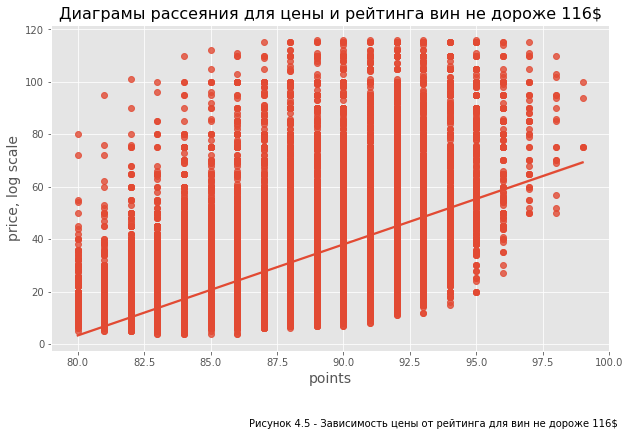

In [147]:
plt.figure(figsize=(10, 6))
sns.regplot(x="points", y='price', data=df_test)
plt.xlim(79,100)
plt.title('Диаграмы рассеяния для цены и рейтинга вин не дороже 116$', fontsize=16)
#plt.yscale('log')
plt.xlabel('points', fontsize=14)
plt.ylabel('price, log scale', fontsize=14)
plt.figtext(0.4, -0.05, "Рисунок 4.5 - Зависимость цены от рейтинга для вин не дороже 116$")

Диаграмма рассеяния показывает явную положительную корреляцию (.55) между двумя переменными.

В качестве зависимой переменной y установим значение цен 'price':

In [148]:
y= np.log(df_test[['price']])
X = df_test[['points']]
print(X,y)

       points
1          96
2          96
3          96
4          95
5          95
...       ...
58558      84
58559      84
58561      84
58562      84
58563      84

[52065 rows x 1 columns]           price
1      4.700480
2      4.499810
3      4.174387
4      4.189655
5      4.290459
...         ...
58558  2.708050
58559  2.708050
58561  1.791759
58562  2.197225
58563  2.079442

[52065 rows x 1 columns]


Разделим выборку на тренировочную и тестовую в соотношении 80% на 20%:

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train, X_test, y_train, y_test)

       points
1300       87
32106      86
15558      88
10818      96
23893      88
...       ...
46895      91
36126      87
29433      83
8566       92
32944      85

[41652 rows x 1 columns]        points
52074      84
28914      90
5439       87
21194      92
41471      86
...       ...
34348      92
9479       91
47469      81
30279      92
3483       91

[10413 rows x 1 columns]           price
1300   4.007333
32106  2.639057
15558  2.197225
10818  4.454347
23893  3.218876
...         ...
46895  4.094345
36126  3.465736
29433  3.465736
8566   4.007333
32944  2.079442

[41652 rows x 1 columns]           price
52074  2.197225
28914  3.806662
5439   3.401197
21194  3.465736
41471  2.564949
...         ...
34348  3.367296
9479   3.912023
47469  2.708050
30279  3.637586
3483   3.496508

[10413 rows x 1 columns]


На обучающей выборке построим модель линейной регрессии, показывающую зависимость между рейтингом и ценой

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

w = model.coef_
b = model.intercept_
print(w, b)

[[0.11240058]] [-6.64325436]


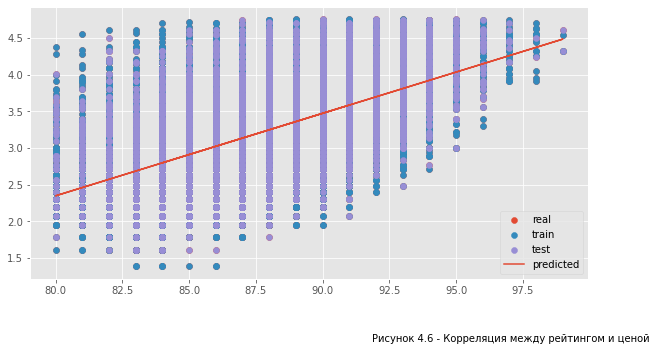

In [151]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_predicted, label='predicted')
plt.figtext(0.6, -0.05, 'Рисунок 4.6 - Корреляция между рейтингом и ценой')
plt.legend()
plt.show()

найдем MSE - среднеквадратичную ошибку (отклонение)

In [152]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted).round(3))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted).round(3))

Train MSE:  0.242
Test MSE:  0.248


Найдем MAE - среднюю абсолютную ошибку

In [153]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted).round(3))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted).round(3))

Train MAE:  0.398
Test MAE:  0.405


Найдем $R^2$ - коэффициент детерминации

In [154]:
from sklearn.metrics import r2_score

print('Train R^2: ', r2_score(y_train, y_train_predicted).round(3))
print('Test R^2: ', r2_score(y_test, y_test_predicted).round(3))

Train R^2:  0.343
Test R^2:  0.331


#### Результаты: 
- подобрано значение отсечки цены равное 116$, за пределами которого предположительно располагаются статистические выбросы; 
- создана очищенная от выбросов выборка двух признаков: рейтинга и цены;
- установлена корреляция между log ценой и рейтингом;
- обучена модель линейной регрессии, куда на вход в качестве зависимой переменной y подано значение цены ('price');
- построена модель линейной регрессии.

#  <a name="5">5. Проверка гипотез </a>

**H0: Средние пользовательские рейтинги красного и белого вина одинаковые.**

**H1: Средние пользовательские рейтинги красного и белого вина разные.**

Для проверки данных гипотез необходимо сделать выборки рейтинга только красных и только белых вин из ранее созданного очищенного от выбросов сета. Прикинем сразу средние значения рейтинга в каждой из выборок.

In [168]:
red = df_t[df_t['color']=="red"]['points']
white = df_t[df_t['color']=="white"]['points']

In [185]:
df_t.query('color != "other"').groupby('color').points.agg([np.mean,np.var]).round(1)

,mean,var
color,,
red,88.1,10.4
white,87.7,9.1


Средние значения рейтинга различаются, дисперсии не равны между собой.

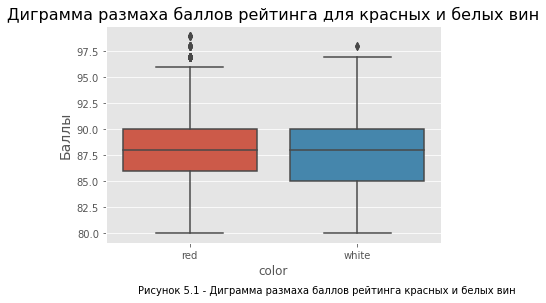

In [170]:
sns.boxplot(data=df_t.query('color != "other"'), y='points', x='color')
plt.title('Диграмма размаха баллов рейтинга для красных и белых вин', fontsize=16)
plt.ylabel('Баллы',fontsize=14)
plt.figtext(0.2, -0.05, "Рисунок 5.1 - Диграмма размаха баллов рейтинга красных и белых вин")
plt.show() 

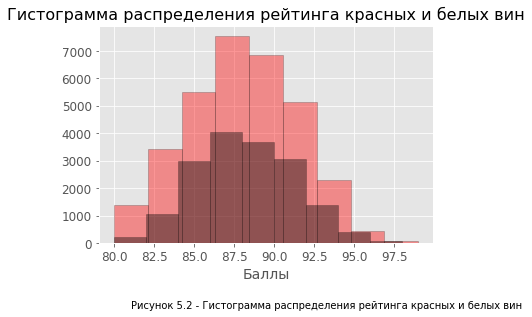

In [171]:
fig, ax = plt.subplots()
 
ax = sns.distplot(df_t.query('color == "red"')['points'], hist=True, kde=False,
             color = 'red', 
             bins=9, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1}) 
ax = sns.distplot(df_t.query('color=="white"')['points'], hist=True, kde=False,
             color = 'black', 
             bins=9, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})

plt.title('Гистограмма распределения рейтинга красных и белых вин', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Баллы', fontsize=14)
plt.figtext(0.2, -0.1, "Рисунок 5.2 - Гистограмма распределения рейтинга красных и белых вин")              
plt.show()

Для проверки нулевой гипотезы применим ttest:

In [172]:
results = st.ttest_ind(red, white, equal_var = False)
print('p-значение:', results.pvalue)
alpha = 0.05
if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не получилось отклонить нулевую гипотезу")

p-значение: 1.3467320687749754e-52
Отклоняем нулевую гипотезу


#### Проверить гипотезы:
**H0: Средние цены на вина Pinot Noir и Chardonnay одинаковые.**

**H1: Средние цены на вина Pinot Noir и Chardonnay разные.**

Для проверки данной пары гипотез необходимо сделать две выборки цен, содержащие только указанные сорта винограда.

In [179]:
pinot = df_t[df_t['variety']=="Pinot Noir"]['price']
chard = df_t[df_t['variety']=="Chardonnay"]['price']

In [180]:
df_t.query('(variety == "Pinot Noir")|(variety == "Chardonnay")').groupby('variety').price.agg([np.mean,np.var]).round(1)

,mean,var
variety,,
Chardonnay,29.3,340.2
Pinot Noir,41.6,375.5


In [181]:
alpha = .05
if np.var(pinot)==np.var(chard):
    print('True')
else:
    print('False')

False


Дисперсии цен не равны между собой, учтем это при проведении t-теста.

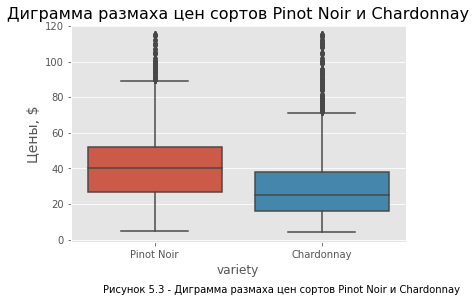

In [182]:
sns.boxplot(data=df_t.query('(variety == "Pinot Noir")|(variety == "Chardonnay")'), y='price', x='variety')
plt.title('Диграмма размаха цен сортов Pinot Noir и Chardonnay', fontsize=16)
plt.ylabel('Цены, $',fontsize=14)
plt.figtext(0.2, -0.05, "Рисунок 5.3 - Диграмма размаха цен сортов Pinot Noir и Chardonnay")
plt.show() 

На диаграмме видно, что Пино Нуар в среднем является более дорогим сортом винограда.

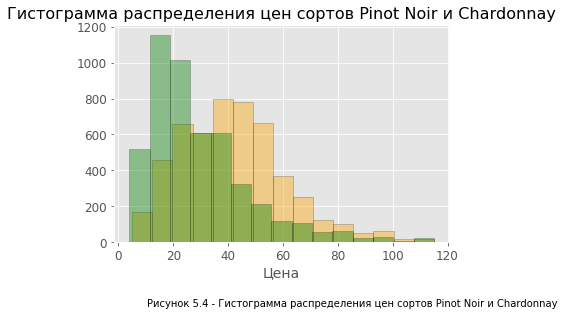

In [183]:
fig, ax = plt.subplots()
 
ax = sns.distplot(df_t.query('variety == "Pinot Noir"')['price'], hist=True, kde=False,
             color = 'orange', 
             bins=15, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1}) 
ax = sns.distplot(df_t.query('variety == "Chardonnay"')['price'], hist=True, kde=False,
             color = 'green', 
             bins=15, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})

plt.title('Гистограмма распределения цен сортов Pinot Noir и Chardonnay', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Цена', fontsize=14)
plt.figtext(0.2, -0.1, "Рисунок 5.4 - Гистограмма распределения цен сортов Pinot Noir и Chardonnay")              
plt.show()

Графически можно увидеть различие средних цен исследуемых сортов.

In [184]:
results = st.ttest_ind(pinot, chard, equal_var = False)
print('p-значение:', results.pvalue)
alpha = 0.05
if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не получилось отклонить нулевую гипотезу")

p-значение: 3.5576722384074637e-221
Отклоняем нулевую гипотезу


#### Результаты: 
- сформулированы нулевая и альтернативная гипотезы о равенстве или неравенстве рейтингов красных и белых вин;
- созданы две выборки рейтингов отдельно только красных и белых вин;
- средние рейтинги белых и красных вин практически совпадают (87.7 и 88.1);
- дисперсии рейтингов не равны между собой (9.1 и 10.4);
- распределение рейтинга вин обоих цветов является нормальным;
- значение p-value получилось меньше принятого критически значимого 0.05, так что нулевая гипотеза о равенстве средних рейтингов была отклонена;
- сформулированы нулевая и альтернативная гипотезы о равенстве или неравенстве цен двух самых популярных сортов винограда;
- созданы две выборки цен, содержащие только сорта Pinot Noir и Chardonnay;
- средние цены равны соответственно 41.6 и 29.3;
- дисперсии цен равны соответственно 375.5 и 34.2);
- значение p-value получилось меньше принятого критически значимого 0.05, так что нулевая гипотеза о равенстве средних цен была отклонена.

# <a name="6">6. Выводы</a>

#### Выводы по разделу 1. Предобработка данных:
* были импортированы 7 необходимых библиотек с соответствующими алиасами;
* по-умолчанию установлен цветовой стиль для графики 'ggplot';
* загружен датасет "winemag-data_first150k.csv" с сайта https://www.kaggle.com/,который содержит информацию о рейтинге вин по версии журнала Wine Enthusiastic за 2017 год;
* загруженный сет включает в себя 150 930 строк и 11 столбцов;
* добавлены два дополнительных столбца "color" и "continent" с информацией о цветах вин и о континентах;
* удалили столбец 'region_2';
* избавились от пропущенных значений:
    - в столбцах 'designation', 'province' и 'region_1' заменили на 'unknown';
    - заполнили недостающую информацию в столбцах 'country', 'color', 'continent';
    - удалили строки с отсутствующими значениями в столбце 'price';
* предобработанный фрэйм содержит 53 306 строки и 11 столбцов.

#### Выводы по разделу 2. Исследовательский анализ данных:
- в US (континент North America) производят наибольшее количество (45%) вин;
- соответственно самая популярная провинция - американская California;
- баллы рейтинга имеют практически симметричное распределение;
- распределение цен имеет явно выраженный положительный перекос, имеются значительные статистические выбросы;
- создан новый столбец "rating", где каждое вино отнесено к определенному классу (от 1 - самых лучших до 6 - приемлемых) в зависимости от рейтинга;
- большую часть рынка (67%) винной продукции рынка занимают красные вина, треть - белые и только 5% - прочие разновидности;
- при прочих равных условиях, признаки 'designation'  и 'region_1' могут быть определяющими цену факторами;
- большим разнообразием и в среднем высокими ценами характеризуются вина, выпущенные американскими винодельнями;
-каждая страна предпочитает свой сорт винограда для вин. По видимому, большой популярностью вино Пино Нуар обязаноамериканскому рынку (там производят почти 4 тыс его видов).
- Самое дорогое красное вино производят из сорта винограда Bordeaux-style Red Blend, белое из сорта Chardonnay;
- Среди красных вин наиболее популярными в бюджетном сегменте является испанский сорт Tempranillo-Garnacha, среди белых - преимущественно аргентинский Torrontés;
- Самым высоким рейтингом в абсолютном выражении (100 баллов) удостоены красный Cabernet Sauvignon и белый Bordeaux-style White Blend сорта винограда.

#### Выводы по разделу 3. Исследовательский анализ данных:
-  в топ 5 популярнейших сортов винограда входят: Pinot Noir, Chardonnay, Cabernet Sauvignon, Red Blend и Sauvignon Blanc;
- 75% всех вин Pinot Noir производят в США;
- рейтинг производимых вин по разному влияет на цены в зависимости от страны.

#### Выводы по разделу 4. Исследование статистических показателей:
- подобрано значение отсечки цены равное 116$, за пределами которого предположительно располагаются статистические выбросы; 
- создана очищенная от выбросов выборка двух признаков: рейтинга и цены;
- установлена корреляция между ценой и рейтингом;
- обучена модель линейной регрессии, куда на вход в качестве зависимой переменной y подано значение логарифмированной цены ('price');
- в принципе, полученная связь между ценой и рейтингом позволяет построить модель линейной регрессии, причем качество модели будет лучше при включении логарифма цены.

#### Выводы по разделу 5. Проверка гипотез:
- сформулированы нулевая и альтернативная гипотезы о равенстве или неравенстве рейтингов красных и белых вин;
- созданы две выборки рейтингов отдельно только красных и белых вин;
- средние рейтинги белых и красных вин практически совпадают (87.7 и 88.1);
- дисперсии рейтингов не равны между собой (9.1 и 10.4);
- распределение рейтинга вин обоих цветов является нормальным;
- значение p-value получилось меньше принятого критически значимого 0.05, так что нулевая гипотеза о равенстве средних рейтингов была отклонена;
- сформулированы нулевая и альтернативная гипотезы о равенстве или неравенстве цен двух самых популярных сортов винограда;
- созданы две выборки цен, содержащие только сорта Pinot Noir и Chardonnay;
- средние цены равны соответственно 41.6 и 29.3;
- дисперсии цен равны соответственно 375.5 и 34.2);
- значение p-value получилось меньше принятого критически значимого 0.05, так что нулевая гипотеза о равенстве средних цен была отклонена.

**<center>Список литературы</center>**

1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
3. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017. 
4.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
6.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018. 